# Assignment 2 - Basic Machine Learning to predict Pokémon battles results

([From Wikipedia](https://en.wikipedia.org/wiki/Pok%C3%A9mon)) *Pokémon is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996,[4] and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.*

In this assignment we present you a dataset with the results of several Pokémon battles.

Your objective will be to produce a ML model that can predict the outcomes of any Pokémon battle.

At first, in this notebook, you will apply some of the basic ML approaches that we have seen in class. At this point you can also work with the *small* versions of the dataset if you want.

Later, on the `pokemon-competition.ipynb` notebook, you will train a model using all the data that will be used to predict *real* Pokémon battles.

**Dataset Description**

Within the `datasets.zip` file that you can download from the virtual campus, you will find the following datasets:

- data.train -> Full data available to train the models
- data_inverse.train -> Same data as data.train but each combat is seen from the other player's perspective (i.e. pokemon1 becomes pokemon2 and viceversa)
- small.train -> Subsample of data.train to allow fast prototyping
- small_inverse.train -> Subsample of data_inverse.train to allow fast prototyping
- data.hidden -> Dataset with no label available
- data_inverse.hidden -> Same as data.hidden but the pokemons are inverted

The datasets *.hidden are the ones used to get the tournament score,
so the true label is unknown. All the other datasets are available to
you to use however you want.

*Gotta Train 'Em All!*

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from functools import reduce

In [2]:

__wd__ = Path("__file__").resolve().parent
datasets_path = __wd__

data = pd.read_csv(datasets_path / "data.train", index_col=0)
inverse_data = pd.read_csv(datasets_path / "data_inverse.train", index_col=0)

def get_Xy(dataset):
    return dataset.drop("Wins", axis=1), dataset["Wins"]

X, y = get_Xy(data)
X_inverse, y_inverse = get_Xy(inverse_data)
X_all, y_all = X.append(X_inverse).reset_index(drop=True), y.append(y_inverse).reset_index(drop=True)
kFold = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.25)
X_all_original, y_all_original = X_all.copy(), y_all.copy()
for train_index, test_index in kFold.split(X_all, y_all):
    X_all, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_all, y_test = y_all.iloc[train_index], y_all.iloc[test_index]
    X_train, y_train = X_all.copy(), y_all.copy()

In [3]:
length = X_all_original.shape[0]
length

80000

In [ ]:
X_all_original

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other
0,Karrablast,Bug,NaN,50.0,72.0,39.0,39.0,42.0,55.0,5.0,...,Normal,NaN,50.0,53.0,43.0,47.0,27.0,40.0,5.0,False
1,NaN,Rock,Water,70.0,NaN,125.0,113.0,78.0,NaN,1.0,...,Fire,NaN,65.0,64.0,NaN,49.0,41.0,39.0,5.0,False
2,Mega Manectric,Electric,NaN,70.0,77.0,81.0,NaN,91.0,136.0,3.0,...,Poison,NaN,NaN,48.0,78.0,NaN,83.0,75.0,5.0,False
3,Bouffalant,Psychic,NaN,95.0,121.0,NaN,39.0,85.0,NaN,5.0,...,Normal,NaN,75.0,108.0,101.0,39.0,68.0,106.0,NaN,False
4,Swablu,Normal,Flying,45.0,36.0,58.0,37.0,76.0,56.0,3.0,...,Psychic,Fairy,40.0,46.0,68.0,108.0,123.0,86.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,Huntail,Water,NaN,55.0,NaN,107.0,NaN,79.0,56.0,3.0,...,Grass,Fairy,60.0,63.0,122.0,79.0,103.0,118.0,5.0,False
79996,Porygon,Normal,NaN,65.0,59.0,70.0,79.0,79.0,33.0,1.0,...,Poison,Water,50.0,63.0,56.0,54.0,54.0,36.0,6.0,NaN
79997,Exploud,Normal,NaN,104.0,91.0,61.0,97.0,117.0,68.0,3.0,...,Fairy,NaN,78.0,58.0,65.0,109.0,NaN,75.0,6.0,False
79998,Fan Rotom,Electric,Dragon,50.0,70.0,101.0,112.0,97.0,83.0,4.0,...,Electric,NaN,NaN,43.0,67.0,55.0,92.0,97.0,4.0,False


In [4]:
X_all_dropped_test = X_all_original.dropna().sample(500, random_state=42)
X_all_dropped_test

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other
57888,Weedle,Bug,Poison,40.0,36.0,30.0,18.0,15.0,44.0,1.0,...,Bug,Poison,70.0,74.0,64.0,88.0,82.0,91.0,1.0,False
15976,Scyther,Bug,Flying,70.0,109.0,82.0,54.0,78.0,102.0,1.0,...,Water,Ground,110.0,88.0,69.0,69.0,69.0,62.0,3.0,False
10945,Gourgeist Small Size,Ghost,Grass,55.0,84.0,117.0,59.0,71.0,96.0,6.0,...,Water,Flying,45.0,19.0,43.0,58.0,123.0,51.0,4.0,False
66937,Tentacruel,Water,Poison,80.0,69.0,70.0,80.0,119.0,104.0,1.0,...,Psychic,Fighting,106.0,190.0,102.0,146.0,97.0,140.0,1.0,True
12729,Noctowl,Normal,Flying,100.0,50.0,46.0,82.0,95.0,65.0,2.0,...,Dark,Psychic,86.0,83.0,88.0,65.0,75.0,65.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51150,Empoleon,Water,Steel,84.0,89.0,85.0,114.0,96.0,61.0,4.0,...,Bug,Ghost,1.0,94.0,45.0,24.0,29.0,33.0,3.0,False
60044,Latias,Dragon,Psychic,80.0,78.0,84.0,107.0,123.0,104.0,3.0,...,Water,Flying,62.0,42.0,45.0,38.0,53.0,57.0,5.0,False
37555,Jirachi,Steel,Psychic,100.0,103.0,96.0,97.0,100.0,103.0,3.0,...,Dark,Dragon,52.0,66.0,38.0,50.0,50.0,39.0,5.0,False
68620,Heliolisk,Electric,Normal,62.0,62.0,49.0,110.0,93.0,114.0,6.0,...,Normal,Psychic,100.0,74.0,78.0,124.0,130.0,89.0,5.0,False


In [5]:
y_all_dropped_test = y_all_original.loc[X_all_dropped_test.index]

In [6]:
X_all_original

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other
0,Karrablast,Bug,NaN,50.0,72.0,39.0,39.0,42.0,55.0,5.0,...,Normal,NaN,50.0,53.0,43.0,47.0,27.0,40.0,5.0,False
1,NaN,Rock,Water,70.0,NaN,125.0,113.0,78.0,NaN,1.0,...,Fire,NaN,65.0,64.0,NaN,49.0,41.0,39.0,5.0,False
2,Mega Manectric,Electric,NaN,70.0,77.0,81.0,NaN,91.0,136.0,3.0,...,Poison,NaN,NaN,48.0,78.0,NaN,83.0,75.0,5.0,False
3,Bouffalant,Psychic,NaN,95.0,121.0,NaN,39.0,85.0,NaN,5.0,...,Normal,NaN,75.0,108.0,101.0,39.0,68.0,106.0,NaN,False
4,Swablu,Normal,Flying,45.0,36.0,58.0,37.0,76.0,56.0,3.0,...,Psychic,Fairy,40.0,46.0,68.0,108.0,123.0,86.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,Huntail,Water,NaN,55.0,NaN,107.0,NaN,79.0,56.0,3.0,...,Grass,Fairy,60.0,63.0,122.0,79.0,103.0,118.0,5.0,False
79996,Porygon,Normal,NaN,65.0,59.0,70.0,79.0,79.0,33.0,1.0,...,Poison,Water,50.0,63.0,56.0,54.0,54.0,36.0,6.0,NaN
79997,Exploud,Normal,NaN,104.0,91.0,61.0,97.0,117.0,68.0,3.0,...,Fairy,NaN,78.0,58.0,65.0,109.0,NaN,75.0,6.0,False
79998,Fan Rotom,Electric,Dragon,50.0,70.0,101.0,112.0,97.0,83.0,4.0,...,Electric,NaN,NaN,43.0,67.0,55.0,92.0,97.0,4.0,False


## Part 1 - Analyze the dataset (2 points)
The first step of any ML process is to know the data we are dealing with. In this part, you have to analyze the dataset and answer the questions below.

1. Which features are categorical? Which are continuous?

In [8]:
# Your code here...
X_all.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other
20991,Pikachu,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,...,NaN,Poison,NaN,31.0,NaN,187.0,NaN,68.0,4.0,False
15258,Cherubi,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,4.0,...,Normal,NaN,100.0,80.0,79.0,130.0,138.0,85.0,5.0,False
65824,NaN,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,6.0,...,NaN,Flying,70.0,72.0,102.0,82.0,100.0,42.0,NaN,False
72104,Swadloon,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,5.0,...,Fire,Psychic,105.0,32.0,109.0,146.0,100.0,60.0,NaN,False
36786,Mareep,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,2.0,...,Grass,Poison,45.0,49.0,52.0,75.0,66.0,35.0,1.0,False


In [9]:
def turn_legendary_num(df):
    df.Legendary = df.Legendary.astype('float64')
    df.Legendary__other = df.Legendary__other.astype('float64')
    return df
X_all = turn_legendary_num(X_all)

In [10]:
is_num = (X_all.dtypes == 'float64')
type_feat = is_num.apply(lambda x: "NUM" if x else "CAT")
df = pd.DataFrame(type_feat)
print("Count num types", X_all.dtypes[is_num].count())
print("Count cat types", X_all.dtypes[~is_num].count())
df

Count num types 16
Count cat types 6


,0
Name,CAT
Type 1,CAT
Type 2,CAT
HP,NUM
Attack,NUM
Defense,NUM
Sp. Atk,NUM
Sp. Def,NUM
Speed,NUM
Generation,NUM


In [11]:
### Explain a little bit that generation is categorical, not numerical

In [12]:
def numerical_cols():
    return ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']

In [13]:
X_all.Legendary.sum() / X_all.Legendary.count()

0.09154877416487668

2. Observe the distribution of the "Type 1" variable. Use a plot to show this distribution.

In [14]:
COLORS_TYPE = {"Normal": "#A8A77A",
    "Fire" : "#EE8130",
    "Water" :  "#6390F0",
    "Electric":  "#F7D02C",
    "Grass" :  "#7AC74C",
    "Ice" : "#96D9D6",
    "Fighting" :  "#C22E28",
    "Poison" :  "#A33EA1",
    "Ground" :  "#E2BF65",
    "Flying" :  "#A98FF3",
    "Psychic":  "#F95587",
    "Bug":  "#A6B91A",
    "Rock":  "#B6A136",
    "Ghost":  "#735797",
    "Dragon":  "#6F35FC",
    "Dark":  "#705746",
    "Steel":  "#B7B7CE",
    "Fairy":  "#D685AD",
              }

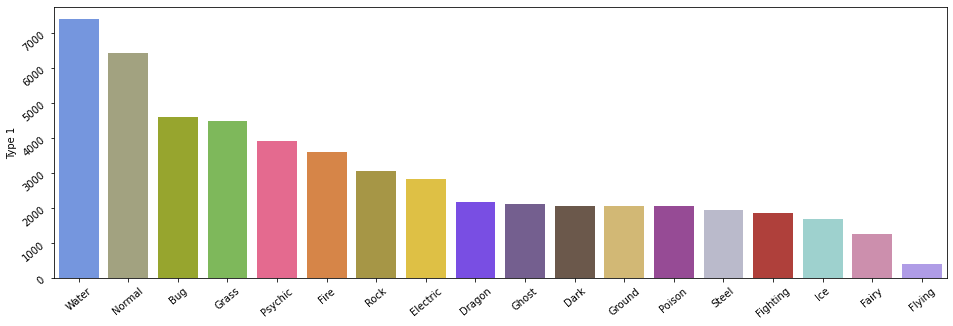

In [15]:
# Your code here...
fig, ax = plt.subplots(1,1, figsize=(16,5))
TYPES = X_all['Type 1'].value_counts().index
COLORS = [COLORS_TYPE[type_str] for type_str in TYPES]
sns.barplot(x=X_all['Type 1'].value_counts().index, y=X_all['Type 1'].value_counts(), palette=COLORS)
plt.tick_params(rotation=40)

3. Determine which of the features have missing values. How many missing values there are for each one?

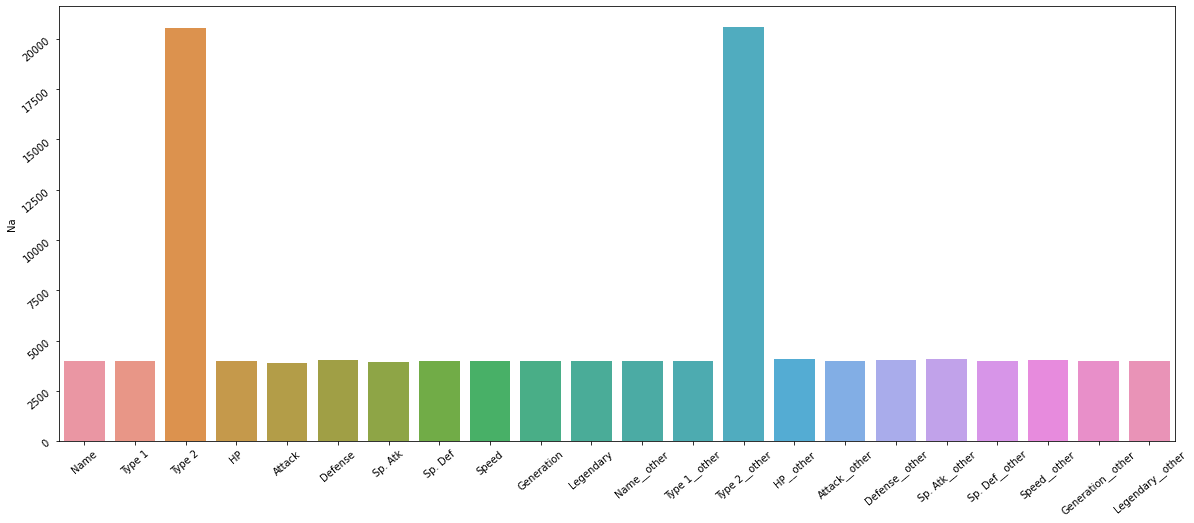

,Na,%
Name,3994,9.9850
Type 1,3974,9.9350
Type 2,20535,51.3375
HP,4006,10.0150
Attack,3897,9.7425
Defense,4034,10.0850
Sp. Atk,3920,9.8000
Sp. Def,3982,9.9550
Speed,3972,9.9300
Generation,3993,9.9825


In [16]:
def missing_values(data):
    df_na = pd.DataFrame(data.isna().sum(), columns=['Na'])
    df_na['%'] = df_na['Na'] / data.shape[0] * 100
    plt.figure(figsize=(20, 8))
    sns.barplot(x=df_na.index, y=df_na['Na'])
    plt.tick_params(rotation=40)
    plt.show()
    return df_na
missing_values(X)

In [17]:
X_pokemons = X_all[X_all.columns[:11]]

In [18]:
X_pokemons.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20991,Pikachu,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,0.0
15258,Cherubi,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,4.0,0.0
65824,NaN,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,6.0,0.0
72104,Swadloon,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,5.0,NaN
36786,Mareep,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,2.0,0.0


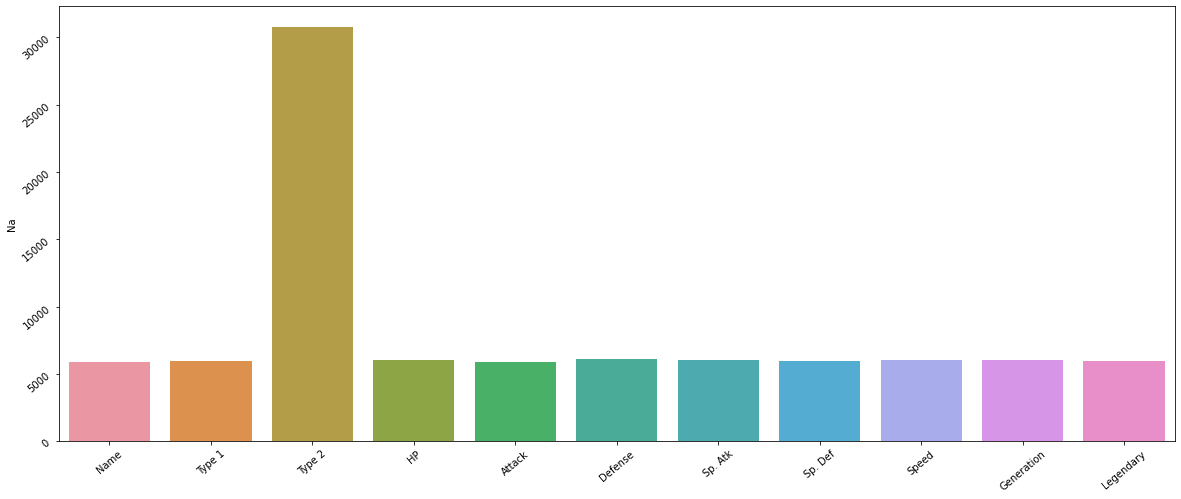

,Na,%
Name,5917,9.861667
Type 1,5991,9.985000
Type 2,30752,51.253333
HP,6057,10.095000
Attack,5925,9.875000
Defense,6112,10.186667
Sp. Atk,6042,10.070000
Sp. Def,5984,9.973333
Speed,6017,10.028333
Generation,6058,10.096667


In [19]:
missing_values(X_pokemons)

In [20]:
na_types = X_all[X_all['Type 1'].isna() & X_all['Type 2'].isna()]
na_size = na_types.shape[0]
print("Amount of pokemons that has type 1 and type 2 as Na: {}".format(na_size))
print(f"%: {na_size / X_all.shape[0] * 100}")

Amount of pokemons that has type 1 and type 2 as Na: 3113
%: 5.188333333333333


In [21]:
def get_na_counts(df):
    na_counts = df.isna().sum(axis=1).value_counts()
    na_counts = pd.DataFrame(zip(na_counts.index, na_counts), columns=['Number of Na per row', 'Number of rows'])
    return na_counts
na_counts = get_na_counts(X_all.drop('Name', axis=1).drop('Name__other', axis=1))
na_counts

,Number of Na per row,Number of rows
0,3,16145
1,2,15381
2,4,10555
3,1,8651
4,5,4907
5,0,1923
6,6,1792
7,7,519
8,8,96
9,9,27


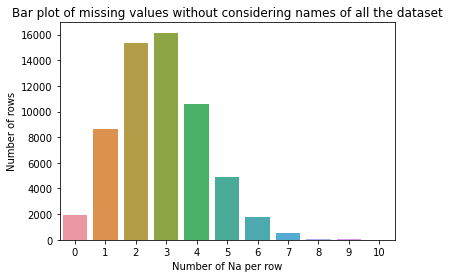

In [22]:
ax = plt.subplot(111)
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], data=na_counts)
ax.set_title('Bar plot of missing values without considering names of all the dataset')
plt.show()

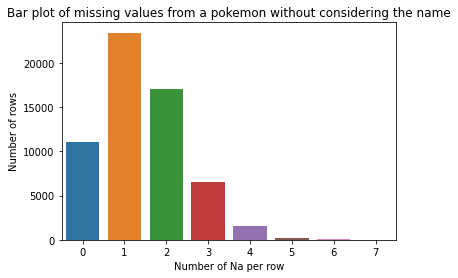

In [23]:
ax = plt.subplot(111)
na_counts = get_na_counts(X_pokemons.drop('Name', axis=1))
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], data=na_counts)
ax.set_title('Bar plot of missing values from a pokemon without considering the name')
plt.show()

In [24]:
na_counts.sort_values(by='Number of rows', ascending=False)

,Number of Na per row,Number of rows
0,1,23442
1,2,17063
2,0,11100
3,3,6525
4,4,1603
5,5,227
6,6,36
7,7,4


Text(0.5, 1.0, 'Missing values from a Pokémon without considering the name and the 2nd type')

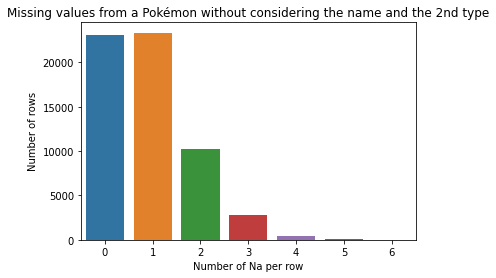

In [25]:
ax = plt.subplot(111)
na_counts = get_na_counts(X_pokemons.drop('Name', axis=1).drop('Type 2', axis=1))
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], data=na_counts)
ax.set_title('Missing values from a Pokémon without considering the name and the 2nd type')

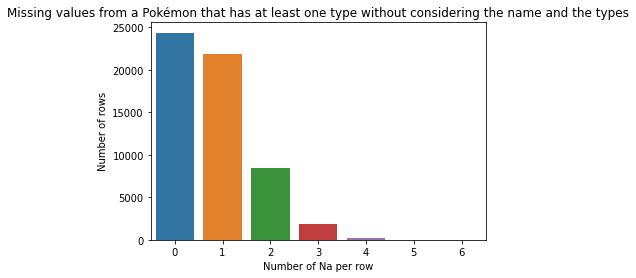

In [26]:
X_pk_noname = X_pokemons.drop('Name', axis=1)
X_pk_hastype = ~X_pk_noname.isna()[['Type 1', 'Type 2']].all(axis=1)
na_counts = get_na_counts(X_pk_noname[X_pk_hastype].drop(['Type 1', 'Type 2'], axis=1))
ax = plt.subplot(111)
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], data=na_counts)
ax.set_title('Missing values from a Pokémon that has at least one type without considering the name and the types')
plt.show()

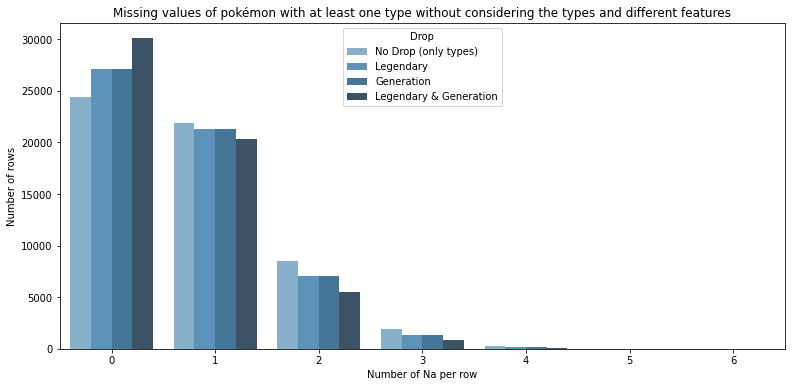

In [27]:
X_pk_nodrop = X_pk_noname[X_pk_hastype].drop(['Type 1', 'Type 2'], axis=1)
na_counts_nodrop = get_na_counts(X_pk_nodrop)
na_counts_nodrop['Drop'] = 'No Drop (only types)'
X_pk_nolegends = X_pk_noname[X_pk_hastype].drop(['Type 1', 'Type 2', 'Legendary'], axis=1)
na_counts_noleg = get_na_counts(X_pk_nolegends)
X_pk_nogen = X_pk_noname[X_pk_hastype].drop(['Type 1', 'Type 2', 'Generation'], axis=1)
na_counts_nogen = get_na_counts(X_pk_nogen)
X_pk_nogenlen = X_pk_noname[X_pk_hastype].drop(['Type 1', 'Type 2', 'Legendary', 'Generation'], axis=1)
na_counts_nogenlen = get_na_counts(X_pk_nogenlen)
na_counts = na_counts_noleg.copy()
na_counts['Drop'] = 'Legendary'
na_counts_nogen['Drop'] = 'Generation'
na_counts_nogenlen['Drop'] = 'Legendary & Generation'
na_counts = na_counts.append(na_counts_nogen)
na_counts = na_counts.append(na_counts_nogenlen)
na_counts = na_counts_nodrop.append(na_counts)
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], hue=na_counts.iloc[:, 2], data=na_counts, palette="Blues_d", ax=ax)
ax.set_title("Missing values of pokémon with at least one type without considering the types and different features")
plt.show()

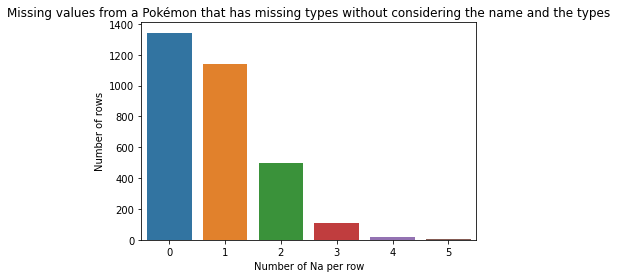

In [28]:
X_pk_noname = X_pokemons.drop('Name', axis=1)
X_pk_notype = X_pk_noname.isna()[['Type 1', 'Type 2']].all(axis=1)
na_counts = get_na_counts(X_pk_noname[X_pk_notype].drop(['Type 1', 'Type 2'], axis=1))
ax = plt.subplot(111)
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], data=na_counts)
ax.set_title('Missing values from a Pokémon that has missing types without considering the name and the types')
plt.show()

In [29]:
X_pk_noname[X_pk_notype].isna().sum()

Type 1        3113
Type 2        3113
HP             322
Attack         337
Defense        314
Sp. Atk        282
Sp. Def        339
Speed          303
Generation     332
Legendary      330
dtype: int64

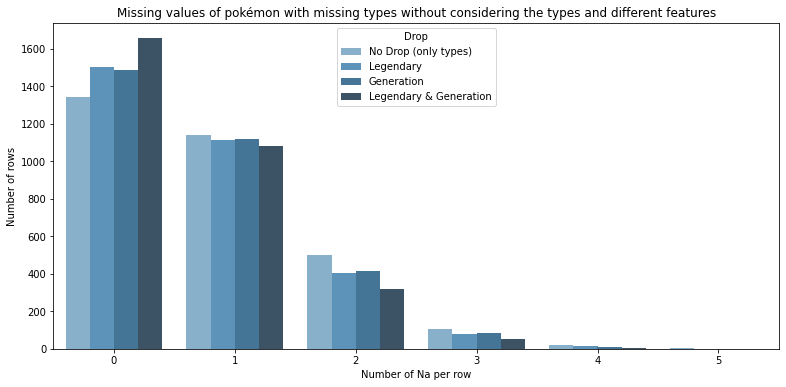

In [30]:
X_pk_nodrop = X_pk_noname[X_pk_notype].drop(['Type 1', 'Type 2'], axis=1)
na_counts_nodrop = get_na_counts(X_pk_nodrop)
na_counts_nodrop['Drop'] = 'No Drop (only types)'
X_pk_nolegends = X_pk_noname[X_pk_notype].drop(['Type 1', 'Type 2', 'Legendary'], axis=1)
na_counts_noleg = get_na_counts(X_pk_nolegends)
X_pk_nogen = X_pk_noname[X_pk_notype].drop(['Type 1', 'Type 2', 'Generation'], axis=1)
na_counts_nogen = get_na_counts(X_pk_nogen)
X_pk_nogenlen = X_pk_noname[X_pk_notype].drop(['Type 1', 'Type 2', 'Legendary', 'Generation'], axis=1)
na_counts_nogenlen = get_na_counts(X_pk_nogenlen)
na_counts = na_counts_noleg.copy()
na_counts['Drop'] = 'Legendary'
na_counts_nogen['Drop'] = 'Generation'
na_counts_nogenlen['Drop'] = 'Legendary & Generation'
na_counts = na_counts.append(na_counts_nogen)
na_counts = na_counts.append(na_counts_nogenlen)
na_counts = na_counts_nodrop.append(na_counts)
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.barplot(x=na_counts.iloc[:, 0], y=na_counts.iloc[:, 1], hue=na_counts.iloc[:, 2], data=na_counts, palette="Blues_d", ax=ax)
ax.set_title("Missing values of pokémon with missing types without considering the types and different features")
plt.show()

4. Analize the distribution of the target column. Is it balanced?

In [31]:
y.isna().sum()

0

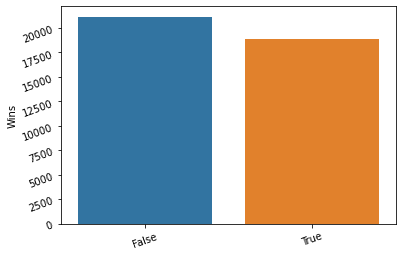

In [32]:
sns.barplot(x=y.value_counts().index.astype('str'),y=y.value_counts())
plt.tick_params(rotation=20)

In [33]:
y.value_counts() / y.shape[0] * 100

False    52.88
True     47.12
Name: Wins, dtype: float64

# Data visualization

- Mirar si la generació té correlació amb stats
- Mirar si els diferents tipus tenen correlació amb stats
    - Mirar si diferents tipus tenen una representació bastant bona amb la mitjana dels stats.
- Si els tipus es passen a dummy features, quants pokemons no tenen cap tipus.

# Roadmap
## Opció 1
- Treure tipus
- Treure generació
- Afegir total stats57082
- Models
    - Logistic Regressions
    - Random Forest
    - SVM

## Opció 2
- Afegir tipus -> dummy features
- Treure generació
- Models
    - RandomForest
    - SVM
   
## Opció 3 (Ensamblador)
- Ensamblar i poca cosa més

In [34]:
X_numerical = X_all[numerical_cols()]
corrs = X_numerical.corr()
corrs

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
HP,1.000000,0.361504,0.203215,0.310187,0.339186,0.160961,0.239461
Attack,0.361504,1.000000,0.372869,0.345895,0.227487,0.338832,0.303519
Defense,0.203215,0.372869,1.000000,0.189180,0.427260,0.010574,0.211759
Sp. Atk,0.310187,0.345895,0.189180,1.000000,0.430170,0.406651,0.386615
Sp. Def,0.339186,0.227487,0.427260,0.430170,1.000000,0.221181,0.305199
Speed,0.160961,0.338832,0.010574,0.406651,0.221181,1.000000,0.285614
Legendary,0.239461,0.303519,0.211759,0.386615,0.305199,0.285614,1.000000


<AxesSubplot:>

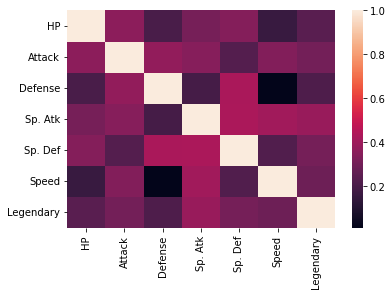

In [35]:
display(sns.heatmap(corrs))

<AxesSubplot:title={'center':'RobustScaler'}>

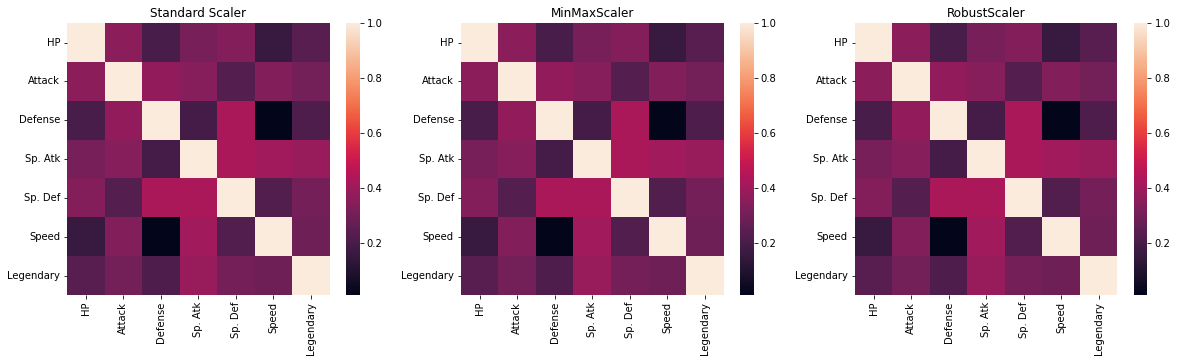

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
scaler = StandardScaler()
new_X = scaler.fit_transform(X_numerical)
new_X = pd.DataFrame(new_X, columns=numerical_cols())
sns.heatmap(new_X.corr(), ax=ax1)
ax1.set_title("Standard Scaler")
scaler = MinMaxScaler()
new_X = scaler.fit_transform(X_numerical)
new_X = pd.DataFrame(new_X, columns=numerical_cols())
sns.heatmap(new_X.corr(), ax=ax2)
ax2.set_title("MinMaxScaler")
scaler = RobustScaler()
new_X = scaler.fit_transform(X_numerical)
new_X = pd.DataFrame(new_X, columns=numerical_cols())
ax3.set_title("RobustScaler")
sns.heatmap(new_X.corr(), ax=ax3)

In [37]:
(corrs.apply(lambda x: x > 0.4).sum() > 1)

HP           False
Attack       False
Defense       True
Sp. Atk       True
Sp. Def       True
Speed         True
Legendary    False
dtype: bool

In [38]:
from collections import defaultdict
def get_correlated_features(df, threshold=0.4):
    visited = []
    data = defaultdict(list)
    for i, row in df.iterrows():
        for i2, cor in row.iteritems():
            if i == i2:
                continue
            if abs(cor) > threshold and not i2 in visited:
                data['Feature 1'].append(i)
                data['Feature 2'].append(i2)
                data['Correlation'].append(cor)
        visited.append(i)
    return pd.DataFrame(data)
print('The most correlated features are:\n')
get_correlated_features(corrs)

The most correlated features are:



,Feature 1,Feature 2,Correlation
0,Defense,Sp. Def,0.427260
1,Sp. Atk,Sp. Def,0.430170
2,Sp. Atk,Speed,0.406651


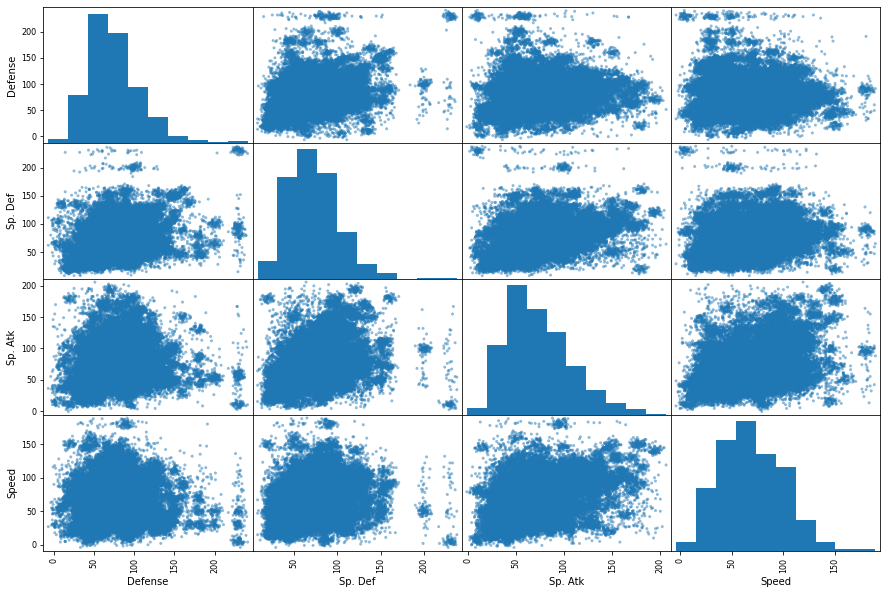

In [40]:
from pandas.plotting import scatter_matrix
corrs_atrs = ['Defense', 'Sp. Def', 'Sp. Atk', 'Speed']
axes = scatter_matrix(X_numerical[corrs_atrs], figsize=(15,10))
plt.show()

In [41]:
from random import randint
def random_color():
    r = lambda: randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())
random_color()

'#020E8D'

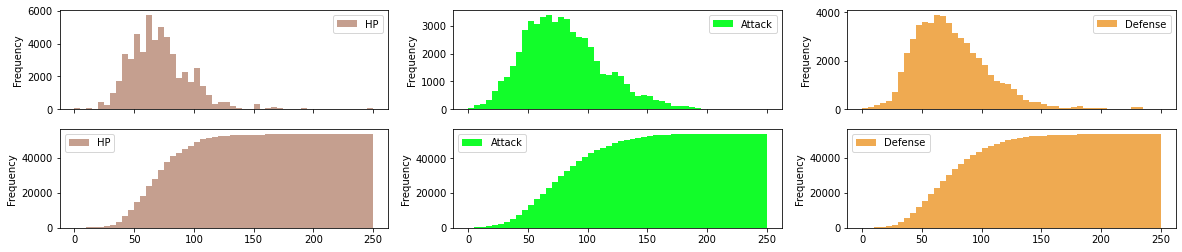

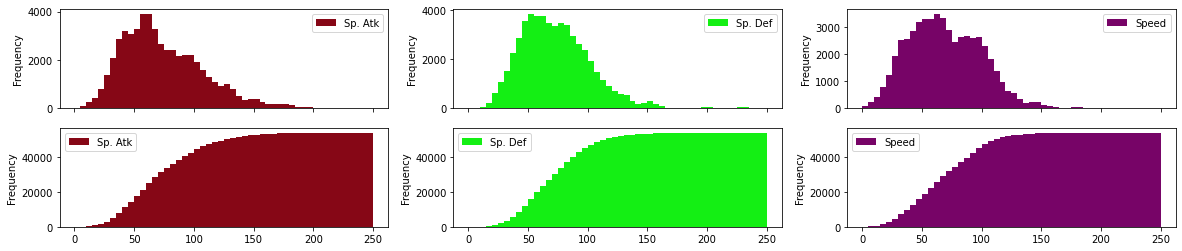

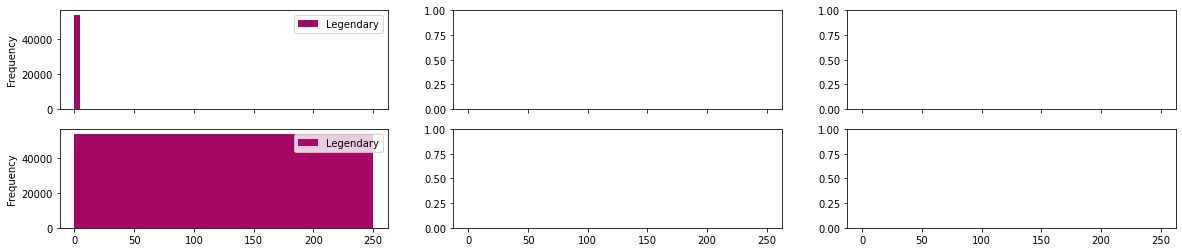

In [42]:
c = 0
fig, axes = plt.subplots(2,3, figsize=(20, 4), sharex=True)
for col in numerical_cols():
    color = random_color()
    X_pokemons.plot(kind = "hist",y=col,bins = 50,range= (0,250), ax = axes[0][c], color=color)
    X_pokemons.plot(kind = "hist",y=col,bins = 50,range= (0,250), ax = axes[1][c], cumulative = True, color=color)
    c += 1
    if c == 3:
        fig, axes = plt.subplots(2,3, figsize=(20, 4), sharex=True)
        c = 0

In [43]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
res1 = onehot.fit_transform(X_pokemons[['Type 1']]).toarray()
res2 = onehot.fit_transform(X_pokemons[['Type 2']]).toarray()
types = pd.DataFrame(res1 + res2, columns=onehot.categories_[0])
types = types.set_index(X_pokemons.index)
types.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
20991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36786,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
X_pokemons_types = pd.concat([X_pokemons, types], axis=1).drop(['Type 1', 'Type 2'], axis=1)
X_pokemons_types.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
20991,Pikachu,NaN,53.0,34.0,73.0,NaN,90.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15258,Cherubi,45.0,NaN,42.0,59.0,49.0,45.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65824,NaN,66.0,61.0,39.0,63.0,58.0,53.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72104,Swadloon,55.0,53.0,90.0,56.0,78.0,40.0,5.0,NaN,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36786,Mareep,55.0,41.0,45.0,67.0,43.0,37.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
stats = X_pokemons_types.columns[1:7]
stats

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [46]:
radiants = [np.pi / 3 * x for x in range(6)] + [0]

In [47]:
def get_stats_by_type(type_str):
    pokemon_of_type = X_pokemons_types[X_pokemons_types[type_str] == 1].iloc[:, 1:7]
    pk_stats = pokemon_of_type.describe()
    res = pd.concat([pk_stats.loc['50%'], pk_stats.loc['mean'], pk_stats.loc['25%'], pk_stats.loc['75%'], pk_stats.loc['max']], axis=1)
    res.columns = ['Median', 'Mean', '25', '75', 'Max']
    return res
stats_bug = get_stats_by_type('Bug')
stats_bug

,Median,Mean,25,75,Max
HP,60.0,58.510292,45.0,70.0,255.0
Attack,66.0,71.612190,44.0,93.0,197.0
Defense,61.0,71.683411,48.0,91.0,241.0
Sp. Atk,50.0,55.303685,34.0,70.0,195.0
Sp. Def,62.0,66.384128,45.0,83.0,238.0
Speed,61.0,63.478771,38.0,86.0,188.0


In [48]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


<PolarAxesSubplot:title={'center':'Stats of type Bug'}>

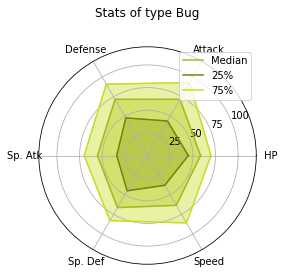

In [49]:
fig, axes = plt.subplots(1,1, subplot_kw={'projection': 'polar'})
def polar_stats(type_str, stats_values, ax, name_values=['Median', '25', '75'], amount_values=[1, 0.7, 1.2], max_val=120):
    ax.set_xticks(radiants[:-1], stats)
    stats_values = stats_values.append(stats_values.iloc[0])
    base_color = COLORS_TYPE[type_str]
    
    colors = [adjust_lightness(base_color, amount) for amount in amount_values]
    for name, color in zip(name_values, colors):
        ax.plot(radiants, stats_values[name], c=color)
    for name, color in zip(name_values, colors):
        ax.fill(radiants, stats_values[name], alpha=0.4, c=color)
    ax.set_rticks([25, 50, 75, 100])
    ax.set_rmax(max_val)
    ax.set_title(f"Stats of type {type_str}", pad=30)
    ax.legend(('Median', '25%', '75%'), loc=1)
    return ax

polar_stats('Bug', stats_bug, axes, ['Mean', '25', '75'], [1, 0.7, 1.2])

In [50]:
len(COLORS_TYPE.keys())

18

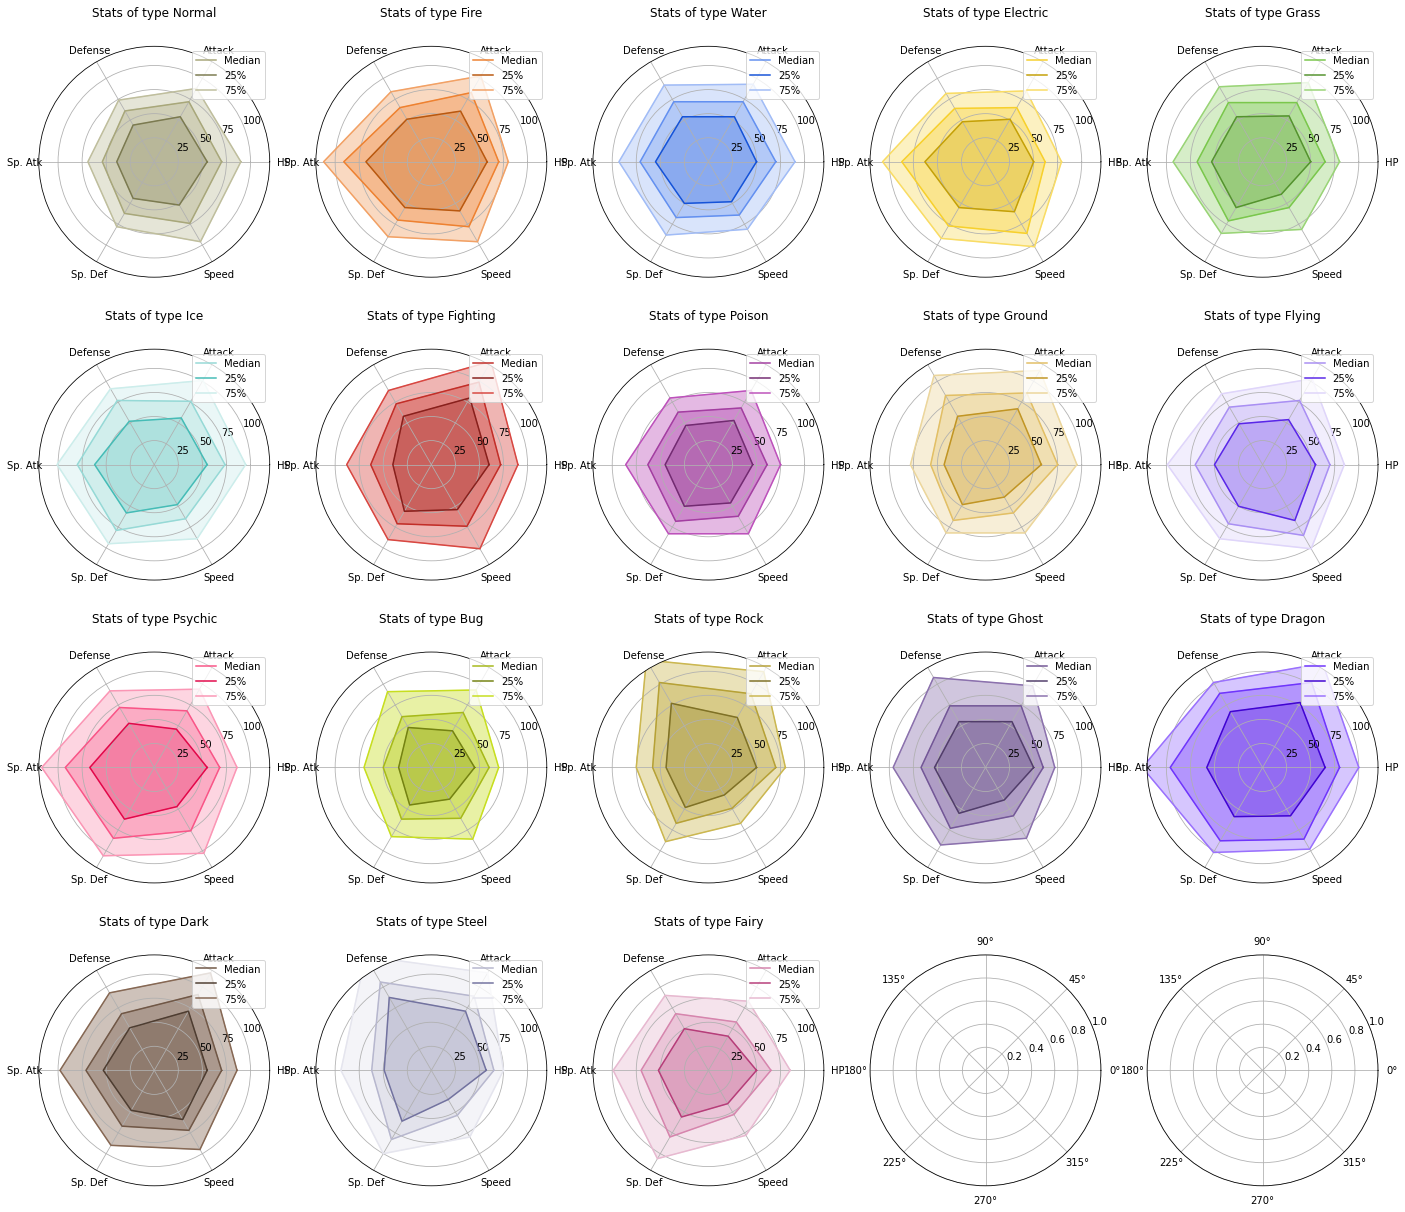

In [51]:
fig, axes = plt.subplots(4,5, subplot_kw={'projection': 'polar'}, figsize=(24, 15))
plt.subplots_adjust(top=1.2)
index_r = 0
index_c = 0
for type_name in COLORS_TYPE.keys():
    medians = get_stats_by_type(type_name)
    polar_stats(type_name, medians, axes[index_r, index_c])
    index_c += 1
    if index_c == 5:
        index_c = 0
        index_r += 1

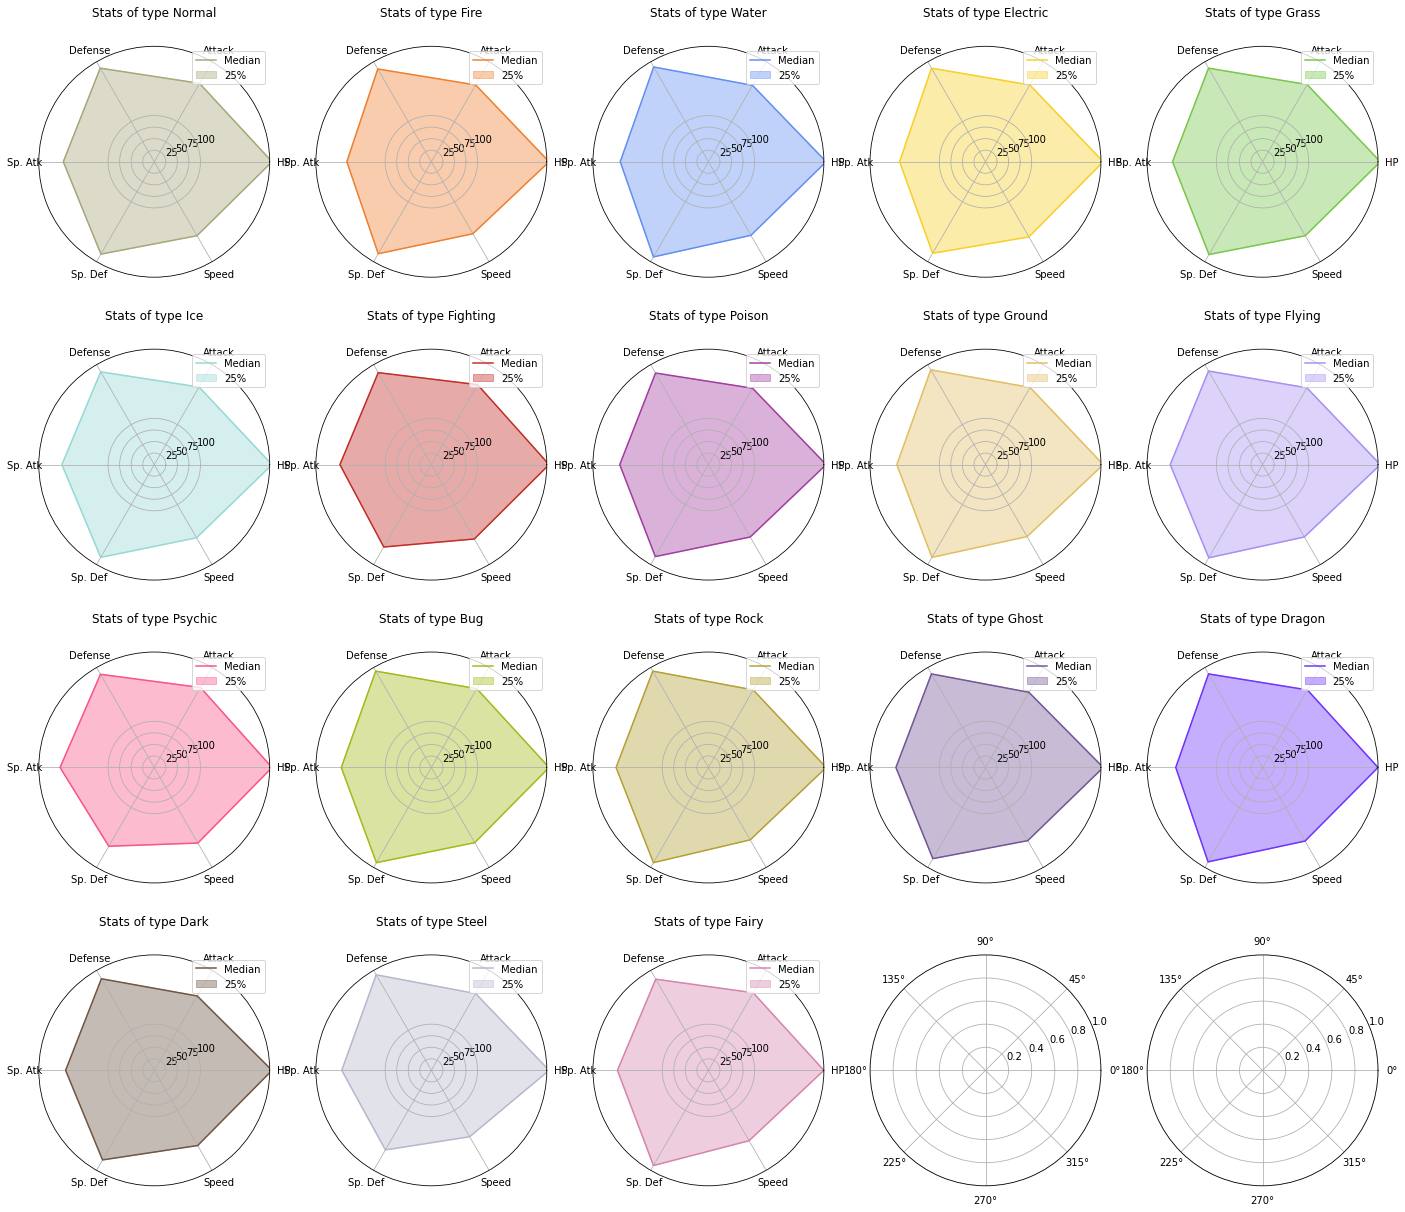

In [52]:
fig, axes = plt.subplots(4,5, subplot_kw={'projection': 'polar'}, figsize=(24, 15))
plt.subplots_adjust(top=1.2)
index_r = 0
index_c = 0
for type_name in COLORS_TYPE.keys():
    medians = get_stats_by_type(type_name)
    polar_stats(type_name, medians, axes[index_r, index_c], name_values=['Max'], max_val=250)
    index_c += 1
    if index_c == 5:
        index_c = 0
        index_r += 1

In [53]:
X_pokemons.sort_values(by='Attack', ascending=False).head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30751,Mega Mewtwo X,Psychic,Fighting,91.0,200.0,103.0,154.0,NaN,136.0,1.0,1.0
59013,Mega Mewtwo X,Psychic,NaN,106.0,200.0,94.0,162.0,98.0,125.0,1.0,1.0
30057,Mega Mewtwo X,Psychic,Fighting,83.0,198.0,109.0,152.0,NaN,NaN,1.0,1.0
20115,Mega Mewtwo X,Psychic,Fighting,106.0,197.0,104.0,157.0,101.0,127.0,1.0,1.0
14587,Mega Heracross,Bug,NaN,64.0,197.0,122.0,32.0,NaN,67.0,2.0,0.0
17809,Mega Mewtwo X,Psychic,Fighting,106.0,196.0,101.0,153.0,100.0,135.0,1.0,1.0
56847,Ambipom,Normal,NaN,75.0,196.0,58.0,55.0,70.0,110.0,4.0,0.0
17367,Mega Mewtwo X,Psychic,Fighting,NaN,196.0,101.0,158.0,NaN,125.0,1.0,1.0
11949,NaN,Psychic,Fighting,106.0,195.0,96.0,152.0,100.0,129.0,1.0,1.0
28383,Mega Mewtwo X,NaN,Fighting,106.0,195.0,100.0,158.0,95.0,132.0,1.0,1.0


In [54]:
X_pokemons.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,53943.000000,54075.000000,53888.000000,53958.000000,54016.000000,53983.000000,53942.000000,54004.000000
mean,69.926218,79.170485,74.628711,73.440824,72.621742,68.902636,3.331560,0.091549
std,26.793828,33.193150,32.238823,33.534062,29.008034,30.080888,1.659437,0.288391
min,1.000000,-4.000000,-7.000000,-1.000000,8.000000,-4.000000,1.000000,0.000000
25%,50.000000,55.000000,52.000000,48.000000,51.000000,46.000000,2.000000,0.000000
50%,65.000000,76.000000,70.000000,67.000000,69.000000,66.000000,3.000000,0.000000
75%,82.000000,99.000000,92.000000,95.000000,90.000000,91.000000,5.000000,0.000000
max,255.000000,200.000000,241.000000,206.000000,238.000000,189.000000,6.000000,1.000000


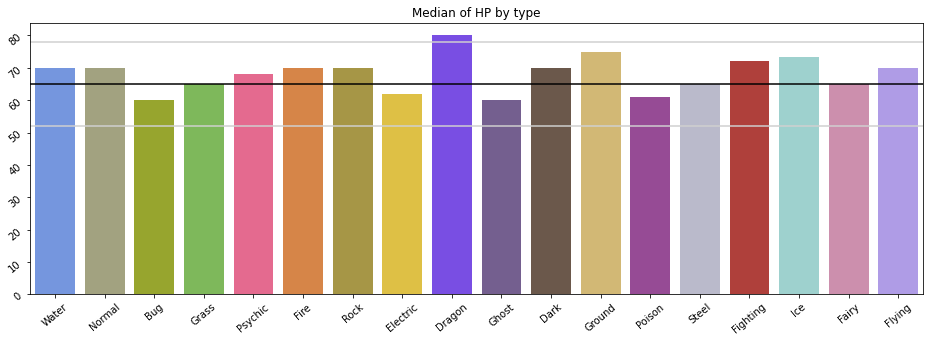

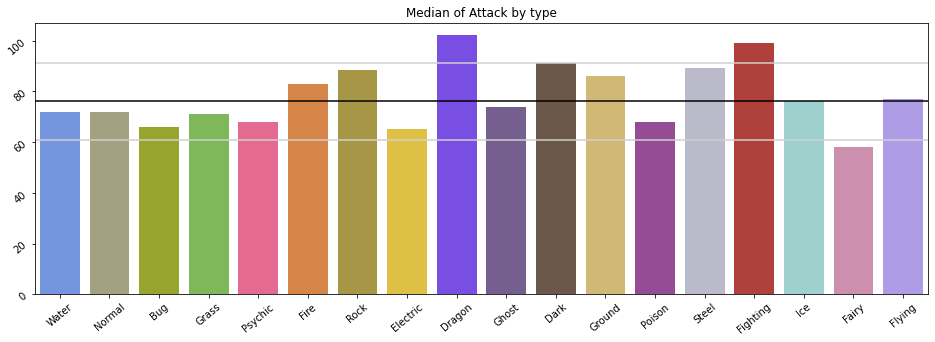

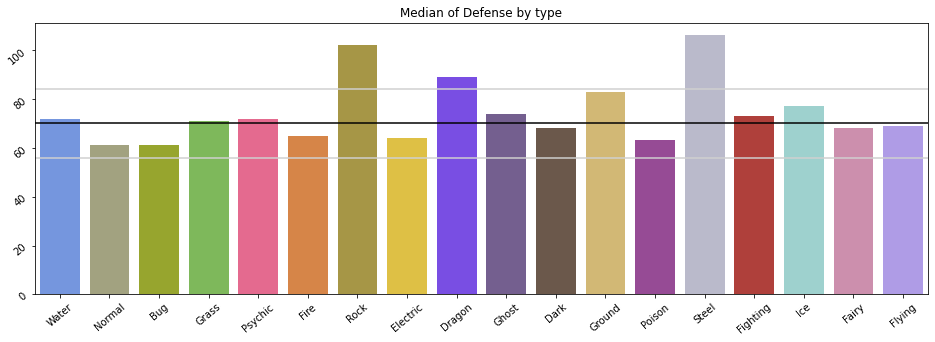

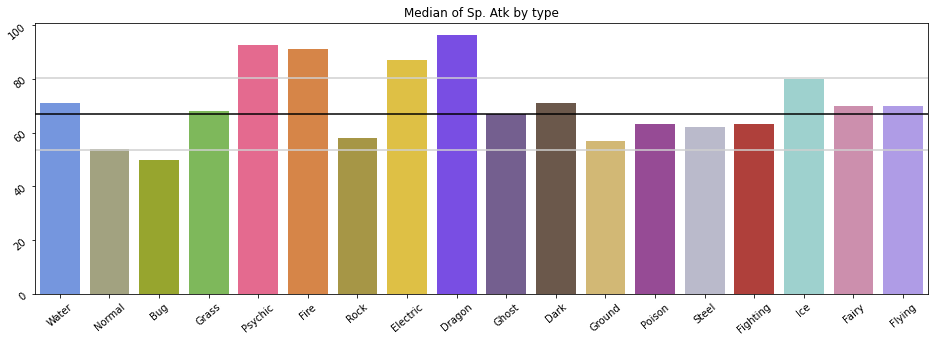

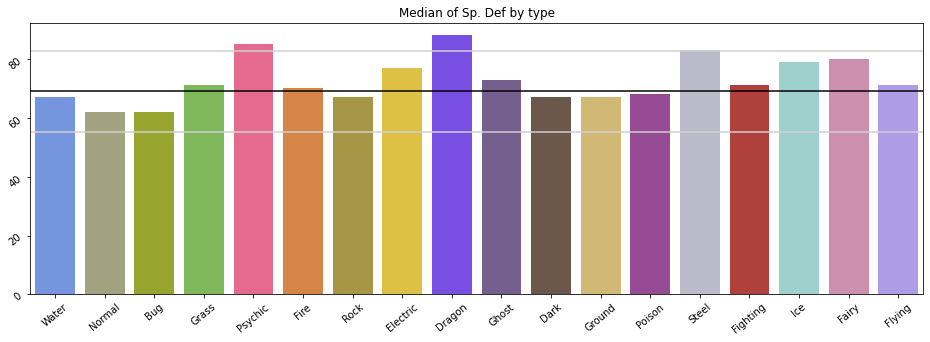

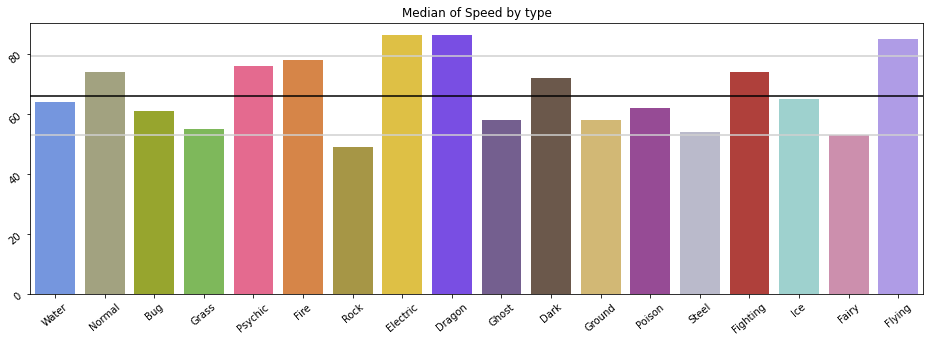

In [55]:
STATS = {type_name : get_stats_by_type(type_name) for type_name in COLORS_TYPE.keys()}
get_stat_by_type = lambda stat_str: lambda type_str : STATS[type_str].loc[stat_str]['Median']

for stat in stats:
    stats_types = [get_stat_by_type(stat)(type_str) for type_str in TYPES]
    fig, ax = plt.subplots(1,1, figsize=(16,5))
    graph = sns.barplot(x=TYPES, y=stats_types, palette=COLORS, ax=ax)
    median = X_pokemons.describe()[stat].loc['50%']
    graph.axhline(median, color='black')
    graph.axhline(median*1.2, color="#d0d0d0")
    graph.axhline(median*0.8, color="#d0d0d0")
    ax.tick_params(rotation=40)
    ax.set_title(f"Median of {stat} by type")

In [56]:
stats

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

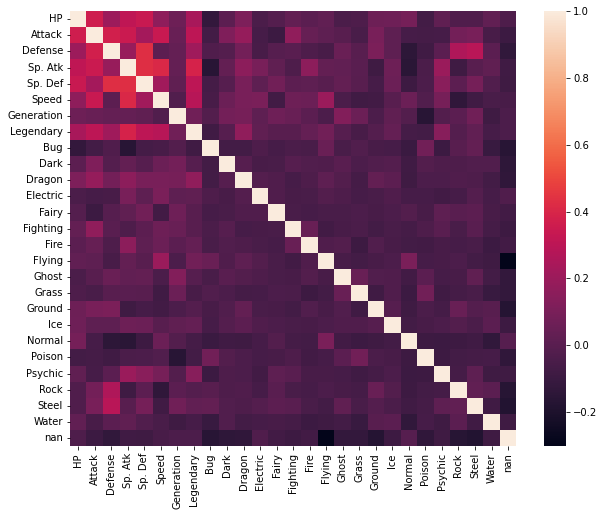

In [57]:
corrs = X_pokemons_types.corr()
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corrs, ax=ax)
plt.show()

In [58]:
import colorsys

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def hex_hsv(value):
    rgb =  hex_to_rgb(value)
    return colorsys.rgb_to_hsv(*rgb)

In [59]:
h, s, v = hex_hsv(COLORS_TYPE['Dragon'])
h, s, v

(0.7152428810720268, 0.7896825396825397, 252)

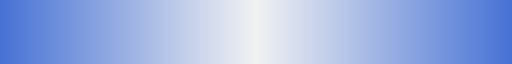

In [60]:
palette_type = sns.diverging_palette(h * 360, h * 360, as_cmap=True, center='light')
palette_type

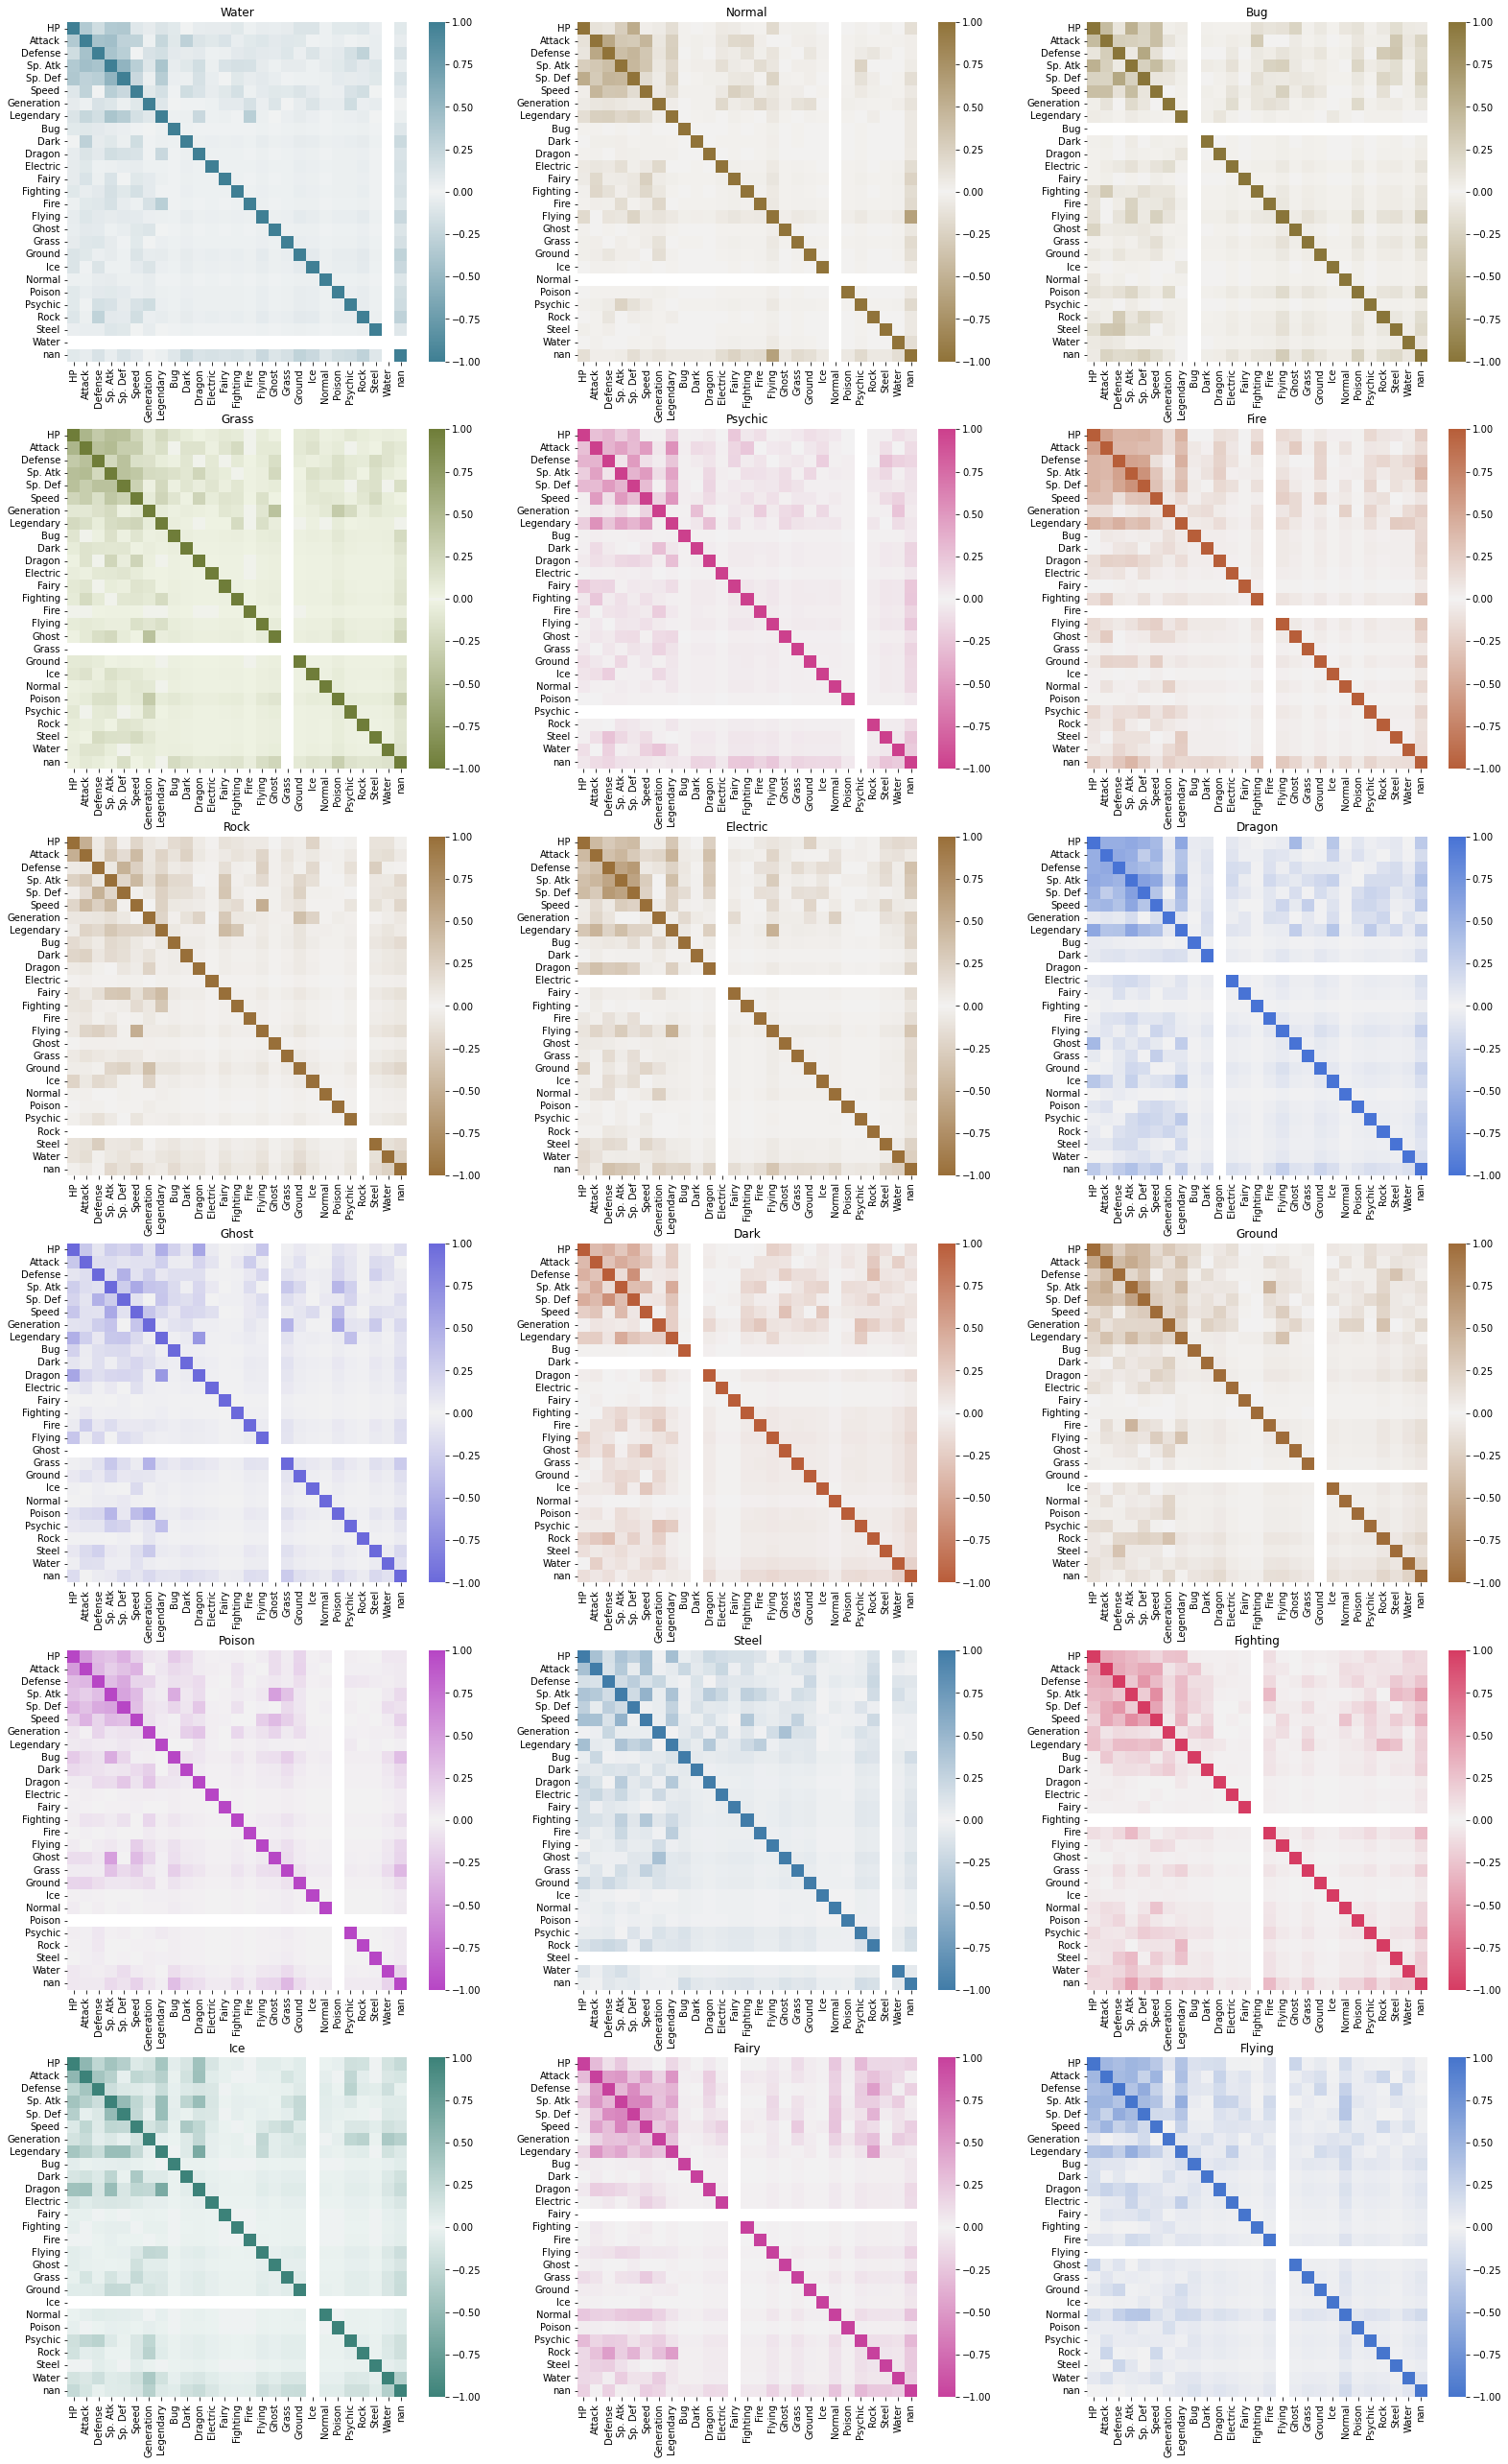

In [61]:
fix, axes = plt.subplots(6, 3, figsize=(27,25))
plt.subplots_adjust(top=1.5)
for i, type_str in enumerate(TYPES):
    ax = axes.flat[i]
    corr = X_pokemons_types[X_pokemons_types[type_str] == 1].corr()
    h, s, v = hex_hsv(COLORS_TYPE[type_str])
    palette_type = sns.diverging_palette(h * 360, h * 360, as_cmap=True)
    sns.heatmap(corr, cmap=palette_type, vmin=-1, vmax=1, ax=ax)
    ax.set_title(type_str)
plt.show()

In [62]:
get_correlated_features(corrs, 0.4).sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
3,NaN,NaN,1.000000
1,Sp. Atk,Sp. Def,0.430170
0,Defense,Sp. Def,0.427260
2,Sp. Atk,Speed,0.406651


In [63]:
for type_str in TYPES:
    corr = X_pokemons_types[X_pokemons_types[type_str] == 1].corr()
    print(type_str)
    display(get_correlated_features(corr, 0.4).sort_values(by='Correlation', ascending=False).iloc[1: , :])
    

Water


,Feature 1,Feature 2,Correlation
3,Sp. Atk,Sp. Def,0.536023
1,Attack,Sp. Atk,0.440424
0,Attack,Defense,0.414614
2,Defense,Sp. Atk,0.404200


Normal


,Feature 1,Feature 2,Correlation
1,Attack,Defense,0.571615
0,HP,Sp. Def,0.541936
2,Attack,Speed,0.465393
3,Defense,Sp. Def,0.462390
4,Sp. Atk,Sp. Def,0.448859
5,Flying,NaN,-0.629122


Bug


,Feature 1,Feature 2,Correlation
4,Defense,Sp. Def,0.589703
1,HP,Sp. Atk,0.513420
0,HP,Attack,0.435925
5,Sp. Atk,Speed,0.423083
2,HP,Speed,0.405269
3,Attack,Speed,0.402954


Grass


,Feature 1,Feature 2,Correlation
0,HP,Attack,0.519044
4,Attack,Sp. Atk,0.470779
1,HP,Sp. Atk,0.442078
2,HP,Sp. Def,0.423837
3,Attack,Defense,0.423513
6,Sp. Atk,Sp. Def,0.419716
5,Defense,Sp. Def,0.416578
7,Generation,Ghost,0.414242


Psychic


,Feature 1,Feature 2,Correlation
2,Attack,Legendary,0.534305
6,Speed,Legendary,0.506654
3,Defense,Sp. Def,0.488583
4,Sp. Atk,Speed,0.486002
1,Attack,Speed,0.481419
0,Attack,Sp. Atk,0.445899
5,Sp. Atk,Legendary,0.436470


Fire


,Feature 1,Feature 2,Correlation
8,Sp. Atk,Sp. Def,0.640815
0,HP,Attack,0.546494
5,Defense,Sp. Atk,0.538265
6,Defense,Sp. Def,0.514397
7,Defense,Legendary,0.437606
4,HP,Legendary,0.432008
3,HP,Sp. Def,0.425985
2,HP,Sp. Atk,0.411356
1,HP,Defense,0.406705
9,Sp. Atk,NaN,-0.401747


Rock


,Feature 1,Feature 2,Correlation
4,Speed,Flying,0.508209
0,HP,Attack,0.501954
2,Defense,Sp. Def,0.485446
3,Sp. Atk,Speed,0.432386
5,Legendary,Fairy,0.420568
1,Attack,Speed,0.416730


Electric


,Feature 1,Feature 2,Correlation
5,Defense,Sp. Def,0.667221
6,Sp. Atk,Sp. Def,0.598213
4,Defense,Sp. Atk,0.579281
7,Legendary,Flying,0.492291
3,Attack,Legendary,0.473206
2,Attack,Sp. Atk,0.453069
0,HP,Attack,0.422320
1,HP,Sp. Def,0.412344


Dragon


,Feature 1,Feature 2,Correlation
12,Sp. Atk,Sp. Def,0.635063
14,Sp. Atk,Legendary,0.587282
5,HP,Legendary,0.582775
13,Sp. Atk,Speed,0.578190
2,HP,Sp. Atk,0.570082
7,Attack,Defense,0.564230
1,HP,Defense,0.527705
8,Attack,Sp. Atk,0.527686
0,HP,Attack,0.523883
3,HP,Sp. Def,0.509451


Ghost


,Feature 1,Feature 2,Correlation
7,Legendary,Dragon,0.650448
1,HP,Dragon,0.547736
3,Sp. Atk,Speed,0.527118
0,HP,Legendary,0.485162
2,Defense,Sp. Def,0.475319
5,Generation,Grass,0.454093
4,Sp. Atk,Poison,0.434949
6,Generation,Poison,-0.544932


Dark


,Feature 1,Feature 2,Correlation
3,Defense,Sp. Def,0.651286
4,Sp. Atk,Legendary,0.474545
2,Attack,Sp. Atk,0.465935
1,HP,Sp. Def,0.457542
0,HP,Defense,0.430016


Ground


,Feature 1,Feature 2,Correlation
6,Sp. Atk,Sp. Def,0.593585
0,HP,Attack,0.541430
4,Attack,Sp. Atk,0.530306
8,Sp. Atk,Fire,0.456397
1,HP,Sp. Atk,0.439480
7,Sp. Atk,Legendary,0.418925
5,Attack,Sp. Def,0.415864
2,HP,Sp. Def,0.415158
3,Attack,Defense,0.412567


Poison


,Feature 1,Feature 2,Correlation
0,HP,Attack,0.502348
4,Sp. Atk,Ghost,0.479873
2,Sp. Atk,Sp. Def,0.446494
1,Defense,Sp. Def,0.419414
3,Sp. Atk,Bug,-0.405827


Steel


,Feature 1,Feature 2,Correlation
4,Sp. Atk,Speed,0.530069
2,HP,Legendary,0.430916
1,HP,Speed,0.425666
3,Attack,Speed,0.419767
0,HP,Attack,0.418206
5,Generation,Ghost,0.413721


Fighting


,Feature 1,Feature 2,Correlation
4,Sp. Atk,Speed,0.547245
3,Defense,Sp. Def,0.505388
6,Sp. Def,Speed,0.428695
2,Attack,Speed,0.408759
0,HP,Attack,0.407488
1,Attack,Sp. Def,0.404492
5,Sp. Atk,NaN,-0.460709


Ice


,Feature 1,Feature 2,Correlation
10,Legendary,Dragon,0.645521
0,HP,Attack,0.529611
6,Sp. Atk,Sp. Def,0.498329
8,Sp. Atk,Dragon,0.481116
9,Sp. Def,Legendary,0.475040
7,Sp. Atk,Legendary,0.472264
5,Attack,Dragon,0.449790
3,HP,Dragon,0.436488
1,HP,Sp. Atk,0.416574
4,Attack,Defense,0.407967


Fairy


,Feature 1,Feature 2,Correlation
7,Sp. Atk,Speed,0.623529
6,Sp. Atk,Sp. Def,0.604627
4,Defense,Sp. Def,0.573608
3,Attack,Legendary,0.522676
1,Attack,Sp. Atk,0.515246
10,Legendary,Rock,0.483866
0,Attack,Defense,0.481414
5,Defense,Rock,0.472646
2,Attack,Speed,0.452380
8,Sp. Atk,Legendary,0.429132


Flying


,Feature 1,Feature 2,Correlation
7,Defense,Sp. Def,0.547876
9,Sp. Atk,Legendary,0.532879
6,Attack,Speed,0.488996
2,HP,Sp. Atk,0.478695
5,Attack,Sp. Atk,0.477294
0,HP,Attack,0.472239
8,Sp. Atk,Sp. Def,0.452077
3,HP,Sp. Def,0.449052
4,Attack,Defense,0.441490
1,HP,Defense,0.411400


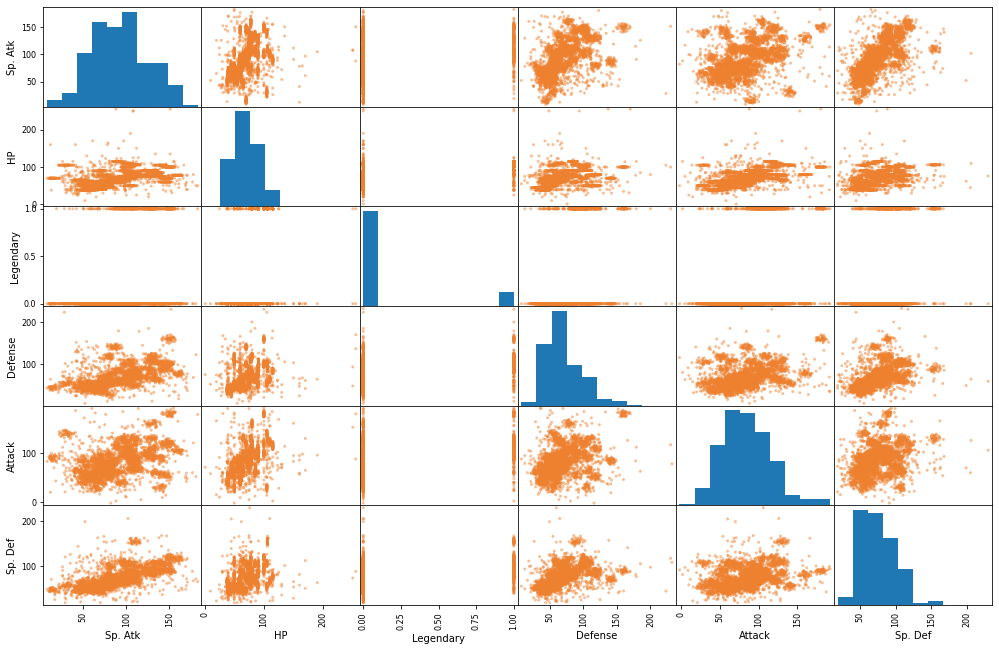

In [64]:
from matplotlib import cm
fire_pokemons = X_pokemons_types[X_pokemons_types['Fire'] == 1]
corr = fire_pokemons.corr()
corr_fire = get_correlated_features(corr, 0.4).sort_values(by='Correlation', ascending=False).iloc[1: , :]
corrs_attrs = list(set(corr_fire['Feature 1']).union(set(corr_fire['Feature 2'])))[1:]
axes = scatter_matrix(fire_pokemons[corrs_attrs], figsize=(17,11), c=COLORS_TYPE['Fire'])
plt.show()

In [65]:
corrs['Defense'].apply(lambda x: abs(x)).sort_values(ascending=False)[:8]

Defense      1.000000
Sp. Def      0.427260
Attack       0.372869
Steel        0.291649
Rock         0.258101
Legendary    0.211759
HP           0.203215
Sp. Atk      0.189180
Name: Defense, dtype: float64

In [66]:
X_pokemons_types_total = X_pokemons_types.copy()
X_pokemons_types_total['TotalStats'] = X_pokemons_types[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

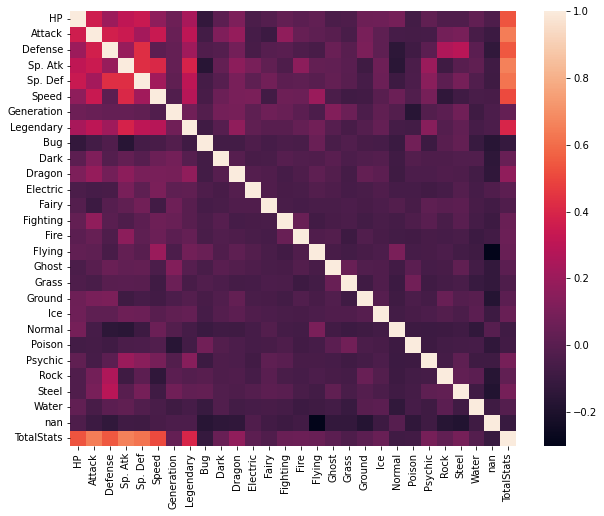

,Feature 1,Feature 2,Correlation
13,NaN,NaN,1.000000
9,Sp. Atk,TotalStats,0.654453
3,Attack,TotalStats,0.644647
10,Sp. Def,TotalStats,0.623227
5,Defense,TotalStats,0.544050
1,HP,TotalStats,0.536616
11,Speed,TotalStats,0.511525
6,Sp. Atk,Sp. Def,0.430170
4,Defense,Sp. Def,0.427260
7,Sp. Atk,Speed,0.406651


In [67]:
corrs = X_pokemons_types_total.corr()
fig, ax = plt.subplots(1,1, figsize=(10,8))
most_corr = get_correlated_features(corrs, 0.35).sort_values(by='Correlation', ascending=False)
sns.heatmap(corrs, ax=ax)
plt.show()
most_corr

## Part 2 - Preprocess the data (3 points)
Once we know how the dataset is, we can proceed with the cleaning of the data. This includes:

- Select the features that you want to use (p.e. removing too specific features). Explain why each feature is used or discarded.
- Impute the missing values. Explain why you use this imputer and not another one. If you use different imputers for different features, explain the reason why you do this.
- Encode the values of the features to work with the model you choose. This can be either encoding the categorical values, or discretizing continuous values.

In [68]:
pipelines = []
preprocessed = []

### 1st Preprocessing

In [69]:
# Your code here...
X_train = X_all.copy()

COLUMNS_TO_DROP = ['Name', 'Generation', 'Legendary', 'Type 1', 'Type 2']
COLUMNS_TO_DROP = [feat + "__other" for feat in COLUMNS_TO_DROP] + COLUMNS_TO_DROP
X_to_process = X_train.drop(COLUMNS_TO_DROP, axis=1)
NUM_COLUMNS = X_to_process.columns
X_to_process

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other
20991,NaN,53.0,34.0,73.0,NaN,90.0,NaN,31.0,NaN,187.0,NaN,68.0
15258,45.0,NaN,42.0,59.0,49.0,45.0,100.0,80.0,79.0,130.0,138.0,85.0
65824,66.0,61.0,39.0,63.0,58.0,53.0,70.0,72.0,102.0,82.0,100.0,42.0
72104,55.0,53.0,90.0,56.0,78.0,40.0,105.0,32.0,109.0,146.0,100.0,60.0
36786,55.0,41.0,45.0,67.0,43.0,37.0,45.0,49.0,52.0,75.0,66.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,65.0,65.0,62.0,NaN,94.0,109.0,NaN,24.0,82.0,24.0,105.0,33.0
36137,40.0,10.0,25.0,33.0,78.0,104.0,70.0,73.0,66.0,79.0,NaN,109.0
57548,63.0,45.0,81.0,99.0,58.0,NaN,70.0,59.0,NaN,82.0,85.0,62.0
3755,50.0,31.0,63.0,23.0,23.0,12.0,35.0,NaN,42.0,58.0,53.0,89.0


In [70]:
na_index = X_to_process.isna().sum(axis=1) == 0
X_to_process = X_to_process[na_index]
y_to_process = y_train[na_index]
X_to_process

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other
65824,66.0,61.0,39.0,63.0,58.0,53.0,70.0,72.0,102.0,82.0,100.0,42.0
72104,55.0,53.0,90.0,56.0,78.0,40.0,105.0,32.0,109.0,146.0,100.0,60.0
36786,55.0,41.0,45.0,67.0,43.0,37.0,45.0,49.0,52.0,75.0,66.0,35.0
342,70.0,98.0,73.0,104.0,77.0,34.0,95.0,74.0,102.0,41.0,68.0,99.0
44163,70.0,61.0,56.0,84.0,61.0,38.0,75.0,108.0,104.0,117.0,105.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75323,89.0,115.0,95.0,112.0,85.0,97.0,114.0,81.0,67.0,82.0,80.0,26.0
78058,55.0,82.0,44.0,82.0,41.0,75.0,1.0,87.0,43.0,35.0,31.0,44.0
56951,40.0,45.0,37.0,60.0,40.0,65.0,65.0,74.0,99.0,90.0,122.0,49.0
5698,75.0,82.0,87.0,102.0,83.0,46.0,50.0,67.0,96.0,38.0,35.0,29.0


In [71]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_to_process = std_scaler.fit_transform(X_to_process)
X_to_process[:5]

array([[-0.14067734, -0.54593473, -1.11548339, -0.3046329 , -0.50350028,
        -0.5195771 ,  0.01887182, -0.20972475,  0.87183432,  0.27156824,
         0.99717932, -0.88308917],
       [-0.5651543 , -0.78922867,  0.48827525, -0.51467211,  0.19997758,
        -0.96107415,  1.38520605, -1.42046247,  1.09215893,  2.18310074,
         0.99717932, -0.27429861],
       [-0.5651543 , -1.15416959, -0.92680591, -0.18461049, -1.03110868,
        -1.06295809, -0.95708121, -0.90589894, -0.70191286,  0.06249437,
        -0.2075337 , -1.11984105],
       [ 0.01367792,  0.57929977, -0.04631097,  0.92559676,  0.16480368,
        -1.16484202,  0.99482484, -0.14918786,  0.87183432, -0.95300728,
        -0.13666822,  1.04474759],
       [ 0.01367792, -0.54593473, -0.58089718,  0.32548473, -0.3979786 ,
        -1.02899677,  0.21406242,  0.87993919,  0.93478421,  1.31693758,
         1.174343  ,  0.26684855]])

#### Creating the preprocessing pipeline

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

def drop_all_na(X, y):
    na_index = X.isna().sum(axis=1) == 0
    return X[na_index], y[na_index]


pipe = Pipeline([
    ('scaler', StandardScaler()),
])

ct = ColumnTransformer([
    ("scaler", pipe, NUM_COLUMNS),
])

pipelines.append(ct)

res = ct.fit_transform(*drop_all_na(X_train, y_train))
res

array([[-0.43781848,  0.55660127,  0.15033703, ...,  0.16477787,
         0.14749474, -0.24991053],
       [-1.33822521, -0.92885161,  0.36584748, ...,  0.79311482,
        -0.24830873,  1.50600045],
       [-0.88802185,  0.43776504,  3.19827062, ...,  0.67887174,
         0.90311956,  1.18993648],
       ...,
       [-1.11312353,  0.17038352,  0.85844281, ..., -0.37787678,
        -1.79554049, -0.24991053],
       [ 0.10242556,  0.73485562,  1.16631489, ...,  0.59318943,
        -0.7520586 ,  1.26017292],
       [ 0.23748657, -0.00787082,  0.24269865, ..., -1.12045682,
        -1.43571915, -1.44393   ]])

### 2nd Preprocessing

The idea is to have the types and create the median of every stat of each type to imput missing values.

In [96]:
X_train = X_all.copy()

COLUMNS_TO_DROP = ['Name', 'Generation', 'Legendary']
add_other = lambda xs: [feat + "__other" for feat in xs] 
COLUMNS_TO_DROP = add_other(COLUMNS_TO_DROP) + COLUMNS_TO_DROP
X_to_process = X_train.drop(COLUMNS_TO_DROP, axis=1)
NUM_COLUMNS = X_to_process.columns
X_to_process

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other
20991,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,Poison,NaN,31.0,NaN,187.0,NaN,68.0
15258,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,Normal,NaN,100.0,80.0,79.0,130.0,138.0,85.0
65824,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,NaN,Flying,70.0,72.0,102.0,82.0,100.0,42.0
72104,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,Fire,Psychic,105.0,32.0,109.0,146.0,100.0,60.0
36786,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,Grass,Poison,45.0,49.0,52.0,75.0,66.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,Psychic,Ground,65.0,65.0,62.0,NaN,94.0,109.0,Steel,NaN,NaN,24.0,82.0,24.0,105.0,33.0
36137,Bug,NaN,40.0,10.0,25.0,33.0,78.0,104.0,Ice,Ghost,70.0,73.0,66.0,79.0,NaN,109.0
57548,Water,Dark,63.0,45.0,81.0,99.0,58.0,NaN,Ground,Flying,70.0,59.0,NaN,82.0,85.0,62.0
3755,Bug,NaN,50.0,31.0,63.0,23.0,23.0,12.0,Electric,NaN,35.0,NaN,42.0,58.0,53.0,89.0


Drop all the columns that has type 1 and type 2 as nulls

In [102]:
hasAllStats = ~X_to_process[stats].isna().any(axis=1)
hasAllStats

20991    False
15258    False
65824     True
72104     True
36786     True
         ...  
21466    False
36137     True
57548    False
3755      True
21464    False
Length: 58543, dtype: bool

In [98]:
columns_check_nan = ['Type 1', 'Type 2']
hasType = ~X_to_process[columns_check_nan].isna().all(axis=1)
hasType

20991    True
15258    True
65824    True
72104    True
36786    True
         ... 
21466    True
36137    True
57548    True
3755     True
21464    True
Length: 60000, dtype: bool

In [99]:
X_to_process = X_to_process[hasAllStats | hasType]
X_to_process

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other
20991,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,Poison,NaN,31.0,NaN,187.0,NaN,68.0
15258,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,Normal,NaN,100.0,80.0,79.0,130.0,138.0,85.0
65824,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,NaN,Flying,70.0,72.0,102.0,82.0,100.0,42.0
72104,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,Fire,Psychic,105.0,32.0,109.0,146.0,100.0,60.0
36786,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,Grass,Poison,45.0,49.0,52.0,75.0,66.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,Psychic,Ground,65.0,65.0,62.0,NaN,94.0,109.0,Steel,NaN,NaN,24.0,82.0,24.0,105.0,33.0
36137,Bug,NaN,40.0,10.0,25.0,33.0,78.0,104.0,Ice,Ghost,70.0,73.0,66.0,79.0,NaN,109.0
57548,Water,Dark,63.0,45.0,81.0,99.0,58.0,NaN,Ground,Flying,70.0,59.0,NaN,82.0,85.0,62.0
3755,Bug,NaN,50.0,31.0,63.0,23.0,23.0,12.0,Electric,NaN,35.0,NaN,42.0,58.0,53.0,89.0


In [103]:
hasAllStats = ~X_to_process[add_other(stats)].isna().any(axis=1)
columns_check_nan = add_other(columns_check_nan)
hasType = ~X_to_process[columns_check_nan].isna().all(axis=1)
X_to_process = X_to_process[hasType | hasAllStats]
X_to_process

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other
20991,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,Poison,NaN,31.0,NaN,187.0,NaN,68.0
15258,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,Normal,NaN,100.0,80.0,79.0,130.0,138.0,85.0
65824,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,NaN,Flying,70.0,72.0,102.0,82.0,100.0,42.0
72104,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,Fire,Psychic,105.0,32.0,109.0,146.0,100.0,60.0
36786,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,Grass,Poison,45.0,49.0,52.0,75.0,66.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,Psychic,Ground,65.0,65.0,62.0,NaN,94.0,109.0,Steel,NaN,NaN,24.0,82.0,24.0,105.0,33.0
36137,Bug,NaN,40.0,10.0,25.0,33.0,78.0,104.0,Ice,Ghost,70.0,73.0,66.0,79.0,NaN,109.0
57548,Water,Dark,63.0,45.0,81.0,99.0,58.0,NaN,Ground,Flying,70.0,59.0,NaN,82.0,85.0,62.0
3755,Bug,NaN,50.0,31.0,63.0,23.0,23.0,12.0,Electric,NaN,35.0,NaN,42.0,58.0,53.0,89.0


It has been found that there are pokemons with the same double type.

In [104]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
res1 = onehot.fit_transform(X_to_process[['Type 1']]).toarray()
res2 = onehot.fit_transform(X_to_process[['Type 2']]).toarray()
types = pd.DataFrame(res1 + res2, columns=onehot.categories_[0])
types = types.set_index(X_to_process.index)
types = types.drop(types.columns[-1], axis=1)
types = types.apply(lambda x: (x != 0).astype(int))
types.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
20991,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
65824,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
72104,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36786,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
X_to_process = pd.concat([X_to_process, types], axis=1).drop(['Type 1', 'Type 2'], axis=1)
X_to_process

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1__other,Type 2__other,HP__other,Attack__other,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
20991,NaN,53.0,34.0,73.0,NaN,90.0,NaN,Poison,NaN,31.0,...,0,0,0,0,0,0,0,0,0,0
15258,45.0,NaN,42.0,59.0,49.0,45.0,Normal,NaN,100.0,80.0,...,0,1,0,0,0,0,0,0,0,0
65824,66.0,61.0,39.0,63.0,58.0,53.0,NaN,Flying,70.0,72.0,...,0,1,0,0,0,0,0,0,0,0
72104,55.0,53.0,90.0,56.0,78.0,40.0,Fire,Psychic,105.0,32.0,...,0,1,0,0,0,0,0,0,0,0
36786,55.0,41.0,45.0,67.0,43.0,37.0,Grass,Poison,45.0,49.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,65.0,65.0,62.0,NaN,94.0,109.0,Steel,NaN,NaN,24.0,...,0,0,1,0,0,0,1,0,0,0
36137,40.0,10.0,25.0,33.0,78.0,104.0,Ice,Ghost,70.0,73.0,...,0,0,0,0,0,0,0,0,0,0
57548,63.0,45.0,81.0,99.0,58.0,NaN,Ground,Flying,70.0,59.0,...,0,0,0,0,0,0,0,0,0,1
3755,50.0,31.0,63.0,23.0,23.0,12.0,Electric,NaN,35.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [106]:
onehot = OneHotEncoder()
res1 = onehot.fit_transform(X_to_process[['Type 1__other']]).toarray()
res2 = onehot.fit_transform(X_to_process[['Type 2__other']]).toarray()
cols = list(map(lambda x: f"{x}__other", onehot.categories_[0]))
types = pd.DataFrame(res1 + res2, columns=cols)
types = types.set_index(X_to_process.index)
types = types.drop(types.columns[-1], axis=1)
types = types.apply(lambda x: (x != 0).astype(int))
types.head()

,Bug__other,Dark__other,Dragon__other,Electric__other,Fairy__other,Fighting__other,Fire__other,Flying__other,Ghost__other,Grass__other,Ground__other,Ice__other,Normal__other,Poison__other,Psychic__other,Rock__other,Steel__other,Water__other
20991,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15258,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
65824,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
72104,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
36786,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [107]:
X_to_process = pd.concat([X_to_process, types], axis=1).drop(['Type 1__other', 'Type 2__other'], axis=1)
X_to_process

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP__other,Attack__other,Defense__other,Sp. Atk__other,...,Ghost__other,Grass__other,Ground__other,Ice__other,Normal__other,Poison__other,Psychic__other,Rock__other,Steel__other,Water__other
20991,NaN,53.0,34.0,73.0,NaN,90.0,NaN,31.0,NaN,187.0,...,0,0,0,0,0,1,0,0,0,0
15258,45.0,NaN,42.0,59.0,49.0,45.0,100.0,80.0,79.0,130.0,...,0,0,0,0,1,0,0,0,0,0
65824,66.0,61.0,39.0,63.0,58.0,53.0,70.0,72.0,102.0,82.0,...,0,0,0,0,0,0,0,0,0,0
72104,55.0,53.0,90.0,56.0,78.0,40.0,105.0,32.0,109.0,146.0,...,0,0,0,0,0,0,1,0,0,0
36786,55.0,41.0,45.0,67.0,43.0,37.0,45.0,49.0,52.0,75.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,65.0,65.0,62.0,NaN,94.0,109.0,NaN,24.0,82.0,24.0,...,0,0,0,0,0,0,0,0,1,0
36137,40.0,10.0,25.0,33.0,78.0,104.0,70.0,73.0,66.0,79.0,...,1,0,0,1,0,0,0,0,0,0
57548,63.0,45.0,81.0,99.0,58.0,NaN,70.0,59.0,NaN,82.0,...,0,0,1,0,0,0,0,0,0,0
3755,50.0,31.0,63.0,23.0,23.0,12.0,35.0,NaN,42.0,58.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
X_to_process.isna().sum()

HP                 5627
Attack             5440
Defense            5672
Sp. Atk            5635
Sp. Def            5513
Speed              5568
HP__other          5671
Attack__other      5409
Defense__other     5580
Sp. Atk__other     5587
Sp. Def__other     5496
Speed__other       5537
Bug                   0
Dark                  0
Dragon                0
Electric              0
Fairy                 0
Fighting              0
Fire                  0
Flying                0
Ghost                 0
Grass                 0
Ground                0
Ice                   0
Normal                0
Poison                0
Psychic               0
Rock                  0
Steel                 0
Water                 0
Bug__other            0
Dark__other           0
Dragon__other         0
Electric__other       0
Fairy__other          0
Fighting__other       0
Fire__other           0
Flying__other         0
Ghost__other          0
Grass__other          0
Ground__other         0
Ice__other      

In [109]:
def get_stats_by_type(X, type_str):
    pokemon_of_type = X[X[type_str] == 1].iloc[:, 0:6]
    pk_stats = pokemon_of_type.describe()
    res = pd.concat([pk_stats.loc['50%'], pk_stats.loc['mean'], pk_stats.loc['25%'], pk_stats.loc['75%'], pk_stats.loc['max']], axis=1)
    res.columns = ['Median', 'Mean', '25', '75', 'Max']
    return res
get_stats_by_type(X_to_process, 'Bug')

,Median,Mean,25,75,Max
HP,60.0,58.507966,45.0,70.0,255.0
Attack,66.0,71.589926,44.0,93.0,197.0
Defense,61.0,71.614455,48.0,91.0,241.0
Sp. Atk,50.0,55.266388,34.0,70.0,195.0
Sp. Def,62.0,66.387774,45.0,83.0,237.0
Speed,61.0,63.452787,38.0,86.0,188.0


In [110]:
median_stats_by_types = {}
for type_str in TYPES:
    median_stats_by_types[type_str] = get_stats_by_type(X_to_process, type_str)['Median']
median_stats_by_types = pd.DataFrame(median_stats_by_types)
median_stats_by_types

,Water,Normal,Bug,Grass,Psychic,Fire,Rock,Electric,Dragon,Ghost,Dark,Ground,Poison,Steel,Fighting,Ice,Fairy,Flying
HP,70.0,70.0,60.0,65.0,68.0,70.0,70.0,62.0,80.0,60.0,70.0,75.0,61.0,65.0,72.0,74.0,65.0,70.0
Attack,72.0,72.0,66.0,71.0,68.0,83.0,89.0,65.0,102.0,74.0,91.0,86.0,68.0,89.0,99.0,76.0,58.0,77.0
Defense,72.0,61.0,61.0,71.0,72.0,65.0,102.0,64.0,89.0,74.0,68.0,83.0,63.0,106.0,73.0,77.0,68.0,69.0
Sp. Atk,71.0,54.0,50.0,69.0,92.0,91.0,58.0,87.0,96.0,67.0,71.0,57.0,63.0,62.0,63.0,80.0,70.0,71.0
Sp. Def,67.0,62.0,62.0,71.0,85.0,70.0,67.0,77.0,88.0,74.0,67.0,67.0,68.0,82.5,71.0,79.0,80.0,71.0
Speed,64.0,74.0,61.0,55.0,76.0,78.0,49.0,86.0,86.0,58.0,72.0,58.0,62.0,54.0,74.0,65.0,53.0,85.0


In [114]:
def get_types(row):
    res = []
    for type_str, val in row.iteritems():
        if val == 1:
            res.append(type_str)
    return res
get_types(X_to_process.iloc[0][12:12 + 18])

['Electric']

In [115]:
get_types(X_to_process.iloc[0][30:30+18])

['Poison__other']

In [116]:
X_to_process.at[20991, 'Sp. Def']

nan

In [117]:
X_to_process.iloc[3888][6:12]

HP__other          90.0
Attack__other       NaN
Defense__other      NaN
Sp. Atk__other    149.0
Sp. Def__other    124.0
Speed__other       93.0
Name: 27908, dtype: float64

In [118]:
for i, row in X_to_process.iterrows():
    types_pokA = get_types(row[12:12 + 18])
    for pokA_stat, pokA_val in row[0:6].iteritems():
        if pd.isna(pokA_val):
            X_to_process.at[i, pokA_stat] = median_stats_by_types[types_pokA].median(axis=1)[pokA_stat]
    types_pokB = list(map(lambda x: x[:-7], get_types(row[30:30 + 18])))
    for pokB_stat, pokB_val in row[6:12].iteritems():
        if pd.isna(pokB_val):
            X_to_process.at[i, pokB_stat] = median_stats_by_types[types_pokB].median(axis=1)[pokA_stat]

In [119]:
X_to_process.isna().sum()

HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
HP__other          0
Attack__other      0
Defense__other     0
Sp. Atk__other     0
Sp. Def__other     0
Speed__other       0
Bug                0
Dark               0
Dragon             0
Electric           0
Fairy              0
Fighting           0
Fire               0
Flying             0
Ghost              0
Grass              0
Ground             0
Ice                0
Normal             0
Poison             0
Psychic            0
Rock               0
Steel              0
Water              0
Bug__other         0
Dark__other        0
Dragon__other      0
Electric__other    0
Fairy__other       0
Fighting__other    0
Fire__other        0
Flying__other      0
Ghost__other       0
Grass__other       0
Ground__other      0
Ice__other         0
Normal__other      0
Poison__other      0
Psychic__other     0
Rock__other        0
Steel__other       0
Water__other 

In [120]:
y_to_process = y_all.copy()
y_to_process = y_to_process.loc[X_to_process.index]
y_to_process

20991     True
15258    False
65824     True
72104    False
36786     True
         ...  
21466     True
36137    False
57548    False
3755     False
21464    False
Name: Wins, Length: 57114, dtype: bool

#### Creating the preprocessing pipeline

In [126]:
def drop_natypes_nastats(X, y):
    hasAllStats = ~X[stats].isna().any(axis=1)
    columns_check_nan = ['Type 1', 'Type 2']
    hasType = ~X[columns_check_nan].isna().all(axis=1)
    X = X[hasType | hasAllStats]
    hasAllStats = ~X[add_other(stats)].isna().any(axis=1)
    columns_check_nan = add_other(columns_check_nan)
    hasType = ~X[columns_check_nan].isna().all(axis=1)
    X = X[hasType | hasAllStats]
    y = y.loc[X.index]
    return X, y

dropped = drop_natypes_nastats(X_train, y_train)
dropped[0].head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 1__other,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other
20991,Pikachu,Electric,NaN,NaN,53.0,34.0,73.0,NaN,90.0,NaN,...,NaN,Poison,NaN,31.0,NaN,187.0,NaN,68.0,4.0,0.0
15258,Cherubi,Grass,NaN,45.0,NaN,42.0,59.0,49.0,45.0,4.0,...,Normal,NaN,100.0,80.0,79.0,130.0,138.0,85.0,5.0,0.0
65824,NaN,Grass,NaN,66.0,61.0,39.0,63.0,58.0,53.0,6.0,...,NaN,Flying,70.0,72.0,102.0,82.0,100.0,42.0,NaN,0.0
72104,Swadloon,Bug,Grass,55.0,53.0,90.0,56.0,78.0,40.0,5.0,...,Fire,Psychic,105.0,32.0,109.0,146.0,100.0,60.0,NaN,0.0
36786,Mareep,Electric,NaN,55.0,41.0,45.0,67.0,43.0,37.0,2.0,...,Grass,Poison,45.0,49.0,52.0,75.0,66.0,35.0,1.0,0.0


In [127]:
dropped[1].head()

20991     True
15258    False
65824     True
72104    False
36786     True
Name: Wins, dtype: bool

In [ ]:
### TODO: Do the pipeline and Column Transformer

## Part 3 - Training your model (3 points)
In this part you have to train a **classifier** model to predict if a Pokemon will win or not a battle against another Pokemon. For this, you should explore at least 3 different classifiers.

You have to train and evaluate those classifiers using cross-validation in order to select the best one. Then, you should also study the results of the model (overfit, underfit, possible bias...).

1. Train (at least) 3 different classifiers
2. Evaluate the 3 classifiers using cross-validation. Select the best model according to this metric.
3. For the selected model: 
   1. Get the accuracy for data not seen during the training process
   2. Plot the confusion matrix
   3. Analize the results of accuracy and the confusion matrix

In [81]:
# Your code here...
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ct = pipelines[0]

In [99]:
classifier = RandomForestClassifier(random_state=42)
res = ct.fit_transform(X_train[na_index], y_train[na_index])
classifier.fit(res, y_train[na_index])

RandomForestClassifier(random_state=42)

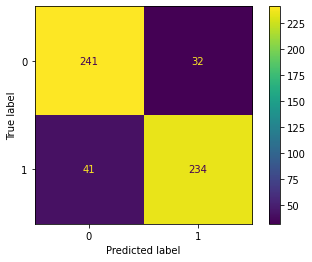

Accuracy: 0.8667883211678832
Precision: 0.8796992481203008
Recall: 0.850909090909091


In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

test_na_index = X_test.isna().sum(axis=1) == 0
X_test_processed = ct.fit_transform(X_test[test_na_index], y_test[test_na_index])

y_pred = classifier.predict(X_test_processed)

def print_scores(y_real, y_pred):
    conf_matrix = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix)
    disp.plot()
    plt.show()
    print("Accuracy:", accuracy_score(y_real, y_pred))
    print("Precision:", precision_score(y_real, y_pred))
    print("Recall:", recall_score(y_real, y_pred))

print_scores(y_test[test_na_index], y_pred)

In [68]:
len(y_pred)

548

In [94]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
res = ct.fit_transform(X_train[na_index], y_train[na_index])
classifier.fit(res, y_train[na_index])

LogisticRegression(random_state=42)

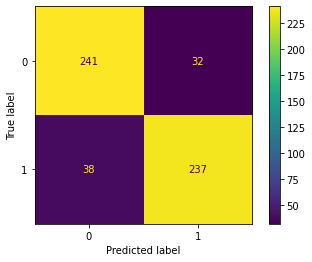

Accuracy: 0.8722627737226277
Precision: 0.8810408921933085
Recall: 0.8618181818181818


In [95]:
test_na_index = X_test.isna().sum(axis=1) == 0
X_test_processed = ct.fit_transform(X_test[test_na_index], y_test[test_na_index])

y_pred = classifier.predict(X_test_processed)
    
print_scores(y_test[test_na_index], y_pred)

In [101]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(random_state=42)
res = ct.fit_transform(X_train[na_index], y_train[na_index])
classifier.fit(res, y_train[na_index])

SGDClassifier(random_state=42)

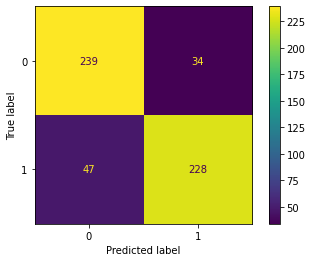

Accuracy: 0.8521897810218978
Precision: 0.8702290076335878
Recall: 0.8290909090909091


In [102]:
test_na_index = X_test.isna().sum(axis=1) == 0
X_test_processed = ct.fit_transform(X_test[test_na_index], y_test[test_na_index])

y_pred = classifier.predict(X_test_processed)
    
print_scores(y_test[test_na_index], y_pred)

In [97]:
from sklearn.svm import SVC

classifier = SVC(random_state=42)
res = ct.fit_transform(X_train[na_index], y_train[na_index])
classifier.fit(res, y_train[na_index])

SVC(random_state=42)

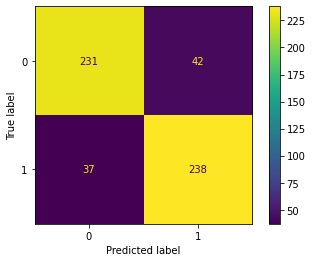

Accuracy: 0.8558394160583942
Precision: 0.85
Recall: 0.8654545454545455


In [98]:
test_na_index = X_test.isna().sum(axis=1) == 0
X_test_processed = ct.fit_transform(X_test[test_na_index], y_test[test_na_index])

y_pred = classifier.predict(X_test_processed)

    
print_scores(y_test[test_na_index], y_pred)

## Part 4 (Optional) - Create an ensemble and configure the model

You have trained different classifiers but selected only one of them as "the best" one. Maybe instead of having the models competing between them, having them to colaborate would yield better results. 

We propose you to create an ensemble of the different classifiers explored in *Part 3*. You should compare the ensemble with the individual models using cross-validation, and then get the final accuracy and the confusion matrix for the ensemble.
As a bonus, try to tune the parameters of this ensemble using either `GridSearchCV` or `RandomizedSearchCV`.

1. Train an ensemble with the classifiers in *Part 3*.
2. Compare the performance of this ensemble using cross-validation, the final accuracy, and the confusion matrix. Analyze the results.
3. Fine-tune the hyper-parameters of the ensemble using `GridSearchCV` or `RandomizedSearchCV`.

In [69]:
# Your code here...

## Part 5 - Wrap-up (2 points)
The final part of this assignment is to wrap-up your classifier into a pipeline. This pipeline will execute the entire process:

- Preprocess the data
    - Select features
    - Impute data
    - Encode values
- The classifier selected in *Part 3* (or the ensemble if it is better)

This pipeline will be used in the other provided notebook to generate the predictions for the combats you have to submit.

To ensure everything works as expected, we recommend you to load the dataset again before using it with the pipeline. You should also compare the accuracy and the confusion matrix from the pipeline with the model trained before. **Remember to set the random state to all the required transformers and estimators to have a constant output**.

In [70]:
# Your code here...